In [2]:
import pandas as pd

trainDf= pd.read_csv('train.csv')
testDf=pd.read_csv('test.csv')


In [8]:
# answerDf=pd.read_csv('answer.csv')

In [42]:
import pandas as pd
df = pd.read_csv('train_labels.csv')
df[['session', 'q']] = df['session_id'].str.split('_q', expand=True)
new_df = df[['session', 'q', 'correct']].copy()
# new_df.rename(columns={'session': 'session_id'}, inplace=True)
print(new_df)
new_df.to_csv('answer.csv', index=False)


                  session   q  correct
0       20090312431273200   1        1
1       20090312433251036   1        0
2       20090312455206810   1        1
3       20090313091715820   1        0
4       20090313571836404   1        1
...                   ...  ..      ...
424111  22100215342220508  18        1
424112  22100215460321130  18        1
424113  22100217104993650  18        1
424114  22100219442786200  18        1
424115  22100221145014656  18        1

[424116 rows x 3 columns]


In [6]:
trainDf.head(25)    

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991405,-159.314686,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
5,20090312431273200,5,3423,person_click,basic,0,NaN,-412.991405,-157.314686,381.0,492.0,NaN,"Sure thing, Jo. Grab your notebook and come up...",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
6,20090312431273200,6,5197,person_click,basic,0,NaN,478.485079,-199.971679,593.0,485.0,NaN,"See you later, Teddy.",teddy,tunic.historicalsociety.closet,tunic.historicalsociety.closet.teddy.intro_0_cs_0,0,0,1,0-4
7,20090312431273200,7,6180,person_click,basic,0,NaN,503.355128,-168.619913,609.0,453.0,NaN,I get to go to Gramps's meeting!,teddy,tunic.historicalsociety.closet,tunic.historicalsociety.closet.teddy.intro_0_cs_0,0,0,1,0-4
8,20090312431273200,8,7014,person_click,basic,0,NaN,510.733442,-157.720642,615.0,442.0,NaN,Now where did I put my notebook?,teddy,tunic.historicalsociety.closet,tunic.historicalsociety.closet.teddy.intro_0_cs_0,0,0,1,0-4
9,20090312431273200,9,7946,person_click,basic,0,NaN,512.048005,-153.743631,616.0,438.0,NaN,\u00f0\u0178\u02dc\u00b4,teddy,tunic.historicalsociety.closet,tunic.historicalsociety.closet.teddy.intro_0_cs_0,0,0,1,0-4


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

# Load your train dataset
df = pd.read_csv('train_labels.csv')

# Define the question predictions for training
# You need to specify how to generate these labels based on your dataset
# Here, I'm creating a hypothetical mapping based on groupings
# Assume q1 corresponds to group 0, q2 to group 1, etc.
# You can adjust these mappings as per your actual requirements

# Assuming that each question corresponds to specific indices in the dataset
question_predictions = {
    'q1': 0,  # First question
    'q2': 1,  # Second question
    'q3': 1,  # Third question
    'q4': 0   # Fourth question
}

# Initialize a dictionary to store models
models = {}

# Loop through each question and prepare data
for question, prediction in question_predictions.items():
    # Filter the dataset for the specific question's group (0-4)
    question_group = trainDf[trainDf['level_group'] == '0-4']  # Adjust as needed based on your groupings
    
    # Create feature matrix X
    # You can customize the feature selection here
    X = question_group[['elapsed_time', 'index', 'room_coor_x', 'room_coor_y']]
    
    # Create target variable y based on the prediction for the current question
    y = [prediction] * len(X)  # Assuming the same label for all entries in this group
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model = RandomForestClassifier()  # Choose your classifier
    model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f'Accuracy for question {question}: {accuracy:.2f}')

    # Save the model
    joblib.dump(model, f'model_{question}.pkl')

    # Store the model in the dictionary
    models[question] = model

# Optional: Display the trained models
print("Trained models for questions:", models.keys())


Accuracy for question q1: 1.00
Accuracy for question q2: 1.00
Accuracy for question q3: 1.00
Accuracy for question q4: 1.00
Trained models for questions: dict_keys(['q1', 'q2', 'q3', 'q4'])


In [19]:
pip install tensorflow tensorflow-decision-forests


SyntaxError: invalid syntax (1758632596.py, line 1)

In [18]:
pip install tensorflow==2.10 tensorflow-decision-forests


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow==2.10 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2)
ERROR: No matching distribution found for tensorflow==2.10

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\siddh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [16]:
pip uninstall tensorflow tensorflow-decision-forests
pip install tensorflow==2.10 tensorflow-decision-forests


SyntaxError: invalid syntax (1872348719.py, line 1)

In [21]:
pip install tensorflow==2.15.0


   ---------------------------------------- 0.0/300.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/300.9 MB 960.0 kB/s eta 0:05:14
   ---------------------------------------- 0.1/300.9 MB 1.4 MB/s eta 0:03:31
   ---------------------------------------- 0.2/300.9 MB 1.5 MB/s eta 0:03:24
   ---------------------------------------- 0.2/300.9 MB 1.4 MB/s eta 0:03:38
   ---------------------------------------- 0.2/300.9 MB 1.4 MB/s eta 0:03:38
   ---------------------------------------- 0.3/300.9 MB 1.0 MB/s eta 0:05:01
   ---------------------------------------- 0.4/300.9 MB 1.1 MB/s eta 0:04:31
   ---------------------------------------- 0.5/300.9 MB 1.2 MB/s eta 0:04:06
   ---------------------------------------- 0.5/300.9 MB 1.3 MB/s eta 0:03:55
   ---------------------------------------- 0.6/300.9 MB 1.4 MB/s eta 0:03:39
   ---------------------------------------- 0.7/300.9 MB 1.4 MB/s eta 0:03:33
   ---------------------------------------- 0.8/300.9 MB 1.5 MB/s eta

  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\siddh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [22]:
pip install --upgrade tensorflow_decision_forests


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\siddh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [25]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
dtypes = {
    'elapsed_time': np.int32,
    'event_name': 'category',
    'name': 'category',
    'level': np.uint8,
    'room_coor_x': np.float32,
    'room_coor_y': np.float32,
    'screen_coor_x': np.float32,
    'screen_coor_y': np.float32,
    'hover_duration': np.float32,
    'text': 'category',
    'fqid': 'category',
    'room_fqid': 'category',
    'text_fqid': 'category',
    'fullscreen': 'category',
    'hq': 'category',
    'music': 'category',
    'level_group': 'category'
}

dataset_df = pd.read_csv('train.csv', dtype=dtypes)

# Load the labels
labels = pd.read_csv('train_labels.csv')
labels['session'] = labels.session_id.apply(lambda x: int(x.split('_')[0]))
labels['q'] = labels.session_id.apply(lambda x: int(x.split('_')[-1][1:]))

# Feature Engineering
CATEGORICAL = ['event_name', 'name', 'fqid', 'room_fqid', 'text_fqid']
NUMERICAL = ['elapsed_time', 'level', 'room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y', 'hover_duration']

def feature_engineer(dataset_df):
    dfs = []
    for c in CATEGORICAL:
        tmp = dataset_df.groupby(['session_id', 'level_group'])[c].agg('nunique')
        dfs.append(tmp)
    for c in NUMERICAL:
        tmp = dataset_df.groupby(['session_id', 'level_group'])[c].agg('mean')
        dfs.append(tmp)
    for c in NUMERICAL:
        tmp = dataset_df.groupby(['session_id', 'level_group'])[c].agg('std')
        dfs.append(tmp)
    dataset_df = pd.concat(dfs, axis=1).fillna(-1).reset_index().set_index('session_id')
    return dataset_df

dataset_df = feature_engineer(dataset_df)

def split_dataset(dataset, test_ratio=0.20):
    USER_LIST = dataset.index.unique()
    split = int(len(USER_LIST) * (1 - test_ratio))
    return dataset.loc[USER_LIST[:split]], dataset.loc[USER_LIST[split:]]

train_x, valid_x = split_dataset(dataset_df)
print("{} examples in training, {} examples in testing.".format(
    len(train_x), len(valid_x)))

# Prepare for model training
VALID_USER_LIST = valid_x.index.unique()
prediction_df = pd.DataFrame(data=np.zeros((len(VALID_USER_LIST), 18)), index=VALID_USER_LIST)
models = {}
evaluation_dict = {}

# Train models for each question
for q_no in range(1, 19):
    # Select level group for each question
    if q_no <= 3:
        grp = '0-4'
    elif q_no <= 13:
        grp = '5-12'
    else:
        grp = '13-22'
    
    # Filter datasets
    train_df = train_x.loc[train_x.level_group == grp]
    train_users = train_df.index.values
    valid_df = valid_x.loc[valid_x.level_group == grp]
    valid_users = valid_df.index.values

    # Get labels for each question
    train_labels = labels.loc[labels.q == q_no].set_index('session').loc[train_users]
    valid_labels = labels.loc[labels.q == q_no].set_index('session').loc[valid_users]

    # Add correct labels to dataset
    train_df["correct"] = train_labels["correct"]
    valid_df["correct"] = valid_labels["correct"]

    # Prepare features and labels for training
    X_train = train_df.loc[:, train_df.columns != 'level_group'].drop(columns=["correct"])
    y_train = train_df["correct"]

    X_valid = valid_df.loc[:, valid_df.columns != 'level_group'].drop(columns=["correct"])
    y_valid = valid_df["correct"]

    # Initialize Decision Tree Classifier
    dt_classifier = DecisionTreeClassifier(random_state=42)

    # Train the model
    dt_classifier.fit(X_train, y_train)

    # Store the model
    models[f'{grp}_{q_no}'] = dt_classifier

    # Make predictions and evaluate accuracy
    y_pred = dt_classifier.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)
    evaluation_dict[q_no] = accuracy

# Print accuracy for each question and average accuracy
for name, value in evaluation_dict.items():
    print(f"Question {name}: Accuracy {value:.4f}")

print("\nAverage accuracy:", sum(evaluation_dict.values()) / 18)


C:\Users\siddh\AppData\Local\Temp\ipykernel_13752\224830770.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp = dataset_df.groupby(['session_id', 'level_group'])[c].agg('nunique')
C:\Users\siddh\AppData\Local\Temp\ipykernel_13752\224830770.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp = dataset_df.groupby(['session_id', 'level_group'])[c].agg('mean')
C:\Users\siddh\AppData\Local\Temp\ipykernel_13752\224830770.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=T

56547 examples in training, 14139 examples in testing.


C:\Users\siddh\AppData\Local\Temp\ipykernel_13752\224830770.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_13752\224830770.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_13752\224830770.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Question 1: Accuracy 0.6138
Question 2: Accuracy 0.9493
Question 3: Accuracy 0.8676
Question 4: Accuracy 0.6972
Question 5: Accuracy 0.5538
Question 6: Accuracy 0.6836
Question 7: Accuracy 0.6276
Question 8: Accuracy 0.5347
Question 9: Accuracy 0.6406
Question 10: Accuracy 0.5198
Question 11: Accuracy 0.5542
Question 12: Accuracy 0.7568
Question 13: Accuracy 0.6164
Question 14: Accuracy 0.6157
Question 15: Accuracy 0.5394
Question 16: Accuracy 0.6083
Question 17: Accuracy 0.5718
Question 18: Accuracy 0.9032

Average accuracy: 0.6585567107527642


In [30]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
dtypes = {
    'elapsed_time': np.int32,
    'event_name': 'category',
    'name': 'category',
    'level': np.uint8,
    'room_coor_x': np.float32,
    'room_coor_y': np.float32,
    'screen_coor_x': np.float32,
    'screen_coor_y': np.float32,
    'hover_duration': np.float32,
    'text': 'category',
    'fqid': 'category',
    'room_fqid': 'category',
    'text_fqid': 'category',
    'fullscreen': 'category',
    'hq': 'category',
    'music': 'category',
    'level_group': 'category'
}

dataset_df = pd.read_csv('train.csv', dtype=dtypes)

# Load the labels
labels = pd.read_csv('train_labels.csv')
labels['session'] = labels.session_id.apply(lambda x: int(x.split('_')[0]))
labels['q'] = labels.session_id.apply(lambda x: int(x.split('_')[-1][1:]))

# Feature Engineering
CATEGORICAL = ['event_name', 'name', 'fqid', 'room_fqid', 'text_fqid']
NUMERICAL = ['elapsed_time', 'level', 'room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y', 'hover_duration']

def feature_engineer(dataset_df):
    dfs = []
    for c in CATEGORICAL:
        tmp = dataset_df.groupby(['session_id', 'level_group'])[c].agg('nunique')
        dfs.append(tmp)
    for c in NUMERICAL:
        tmp = dataset_df.groupby(['session_id', 'level_group'])[c].agg('mean')
        dfs.append(tmp)
    for c in NUMERICAL:
        tmp = dataset_df.groupby(['session_id', 'level_group'])[c].agg('std')
        dfs.append(tmp)
    dataset_df = pd.concat(dfs, axis=1).fillna(-1).reset_index().set_index('session_id')
    return dataset_df

dataset_df = feature_engineer(dataset_df)

def split_dataset(dataset, test_ratio=0.20):
    USER_LIST = dataset.index.unique()
    split = int(len(USER_LIST) * (1 - test_ratio))
    return dataset.loc[USER_LIST[:split]], dataset.loc[USER_LIST[split:]]

train_x, valid_x = split_dataset(dataset_df)
print("{} examples in training, {} examples in testing.".format(
    len(train_x), len(valid_x)))

# Prepare for model training
VALID_USER_LIST = valid_x.index.unique()
prediction_df = pd.DataFrame(data=np.zeros((len(VALID_USER_LIST), 18)), index=VALID_USER_LIST)
models = {}
evaluation_dict = {}

# Train models for each question
for q_no in range(1, 19):
    # Select level group for each question
    if q_no <= 3:
        grp = '0-4'
    elif q_no <= 13:
        grp = '5-12'
    else:
        grp = '13-22'
    
    # Filter datasets
    train_df = train_x.loc[train_x.level_group == grp]
    train_users = train_df.index.values
    valid_df = valid_x.loc[valid_x.level_group == grp]
    valid_users = valid_df.index.values

    # Get labels for each question
    train_labels = labels.loc[labels.q == q_no].set_index('session').loc[train_users]
    valid_labels = labels.loc[labels.q == q_no].set_index('session').loc[valid_users]

    # Add correct labels to dataset
    train_df["correct"] = train_labels["correct"]
    valid_df["correct"] = valid_labels["correct"]

    # Prepare features and labels for training
    X_train = train_df.loc[:, train_df.columns != 'level_group'].drop(columns=["correct"])
    y_train = train_df["correct"]

    X_valid = valid_df.loc[:, valid_df.columns != 'level_group'].drop(columns=["correct"])
    y_valid = valid_df["correct"]

    # Initialize Random Forest Classifier
    rf_classifier = RandomForestClassifier(random_state=42)

    # Train the model
    rf_classifier.fit(X_train, y_train)

    # Store the model
    # models[f'{grp}_{q_no}'] = rf_classifier

    # Make predictions and evaluate accuracy
    y_pred = rf_classifier.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)
    evaluation_dict[q_no] = accuracy

# Print accuracy for each question and average accuracy
for name, value in evaluation_dict.items():
    print(f"Question {name}: Accuracy {value:.4f}")

print("\nAverage accuracy:", sum(evaluation_dict.values()) / 18)


C:\Users\siddh\AppData\Local\Temp\ipykernel_13752\2508080352.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp = dataset_df.groupby(['session_id', 'level_group'])[c].agg('nunique')
C:\Users\siddh\AppData\Local\Temp\ipykernel_13752\2508080352.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp = dataset_df.groupby(['session_id', 'level_group'])[c].agg('mean')
C:\Users\siddh\AppData\Local\Temp\ipykernel_13752\2508080352.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observe

56547 examples in training, 14139 examples in testing.


C:\Users\siddh\AppData\Local\Temp\ipykernel_13752\2508080352.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_13752\2508080352.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_13752\2508080352.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

Question 1: Accuracy 0.7299
Question 2: Accuracy 0.9756
Question 3: Accuracy 0.9346
Question 4: Accuracy 0.7904
Question 5: Accuracy 0.6140
Question 6: Accuracy 0.7887
Question 7: Accuracy 0.7452
Question 8: Accuracy 0.6181
Question 9: Accuracy 0.7647
Question 10: Accuracy 0.5803
Question 11: Accuracy 0.6497
Question 12: Accuracy 0.8697
Question 13: Accuracy 0.7206
Question 14: Accuracy 0.7331
Question 15: Accuracy 0.5892
Question 16: Accuracy 0.7456
Question 17: Accuracy 0.6991
Question 18: Accuracy 0.9514

Average accuracy: 0.7499941061366905


In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
dtypes = {
    'elapsed_time': np.int32,
    'event_name': 'category',
    'name': 'category',
    'level': np.uint8,
    'room_coor_x': np.float32,
    'room_coor_y': np.float32,
    'screen_coor_x': np.float32,
    'screen_coor_y': np.float32,
    'hover_duration': np.float32,
    'text': 'category',
    'fqid': 'category',
    'room_fqid': 'category',
    'text_fqid': 'category',
    'fullscreen': 'category',
    'hq': 'category',
    'music': 'category',
    'level_group': 'category'
}

dataset_df = pd.read_csv('train.csv', dtype=dtypes)

# Load the labels
labels = pd.read_csv('train_labels.csv')
labels['session'] = labels.session_id.apply(lambda x: int(x.split('_')[0]))
labels['q'] = labels.session_id.apply(lambda x: int(x.split('_')[-1][1:]))
print(labels)


                   session_id  correct            session   q
0        20090312431273200_q1        1  20090312431273200   1
1        20090312433251036_q1        0  20090312433251036   1
2        20090312455206810_q1        1  20090312455206810   1
3        20090313091715820_q1        0  20090313091715820   1
4        20090313571836404_q1        1  20090313571836404   1
...                       ...      ...                ...  ..
424111  22100215342220508_q18        1  22100215342220508  18
424112  22100215460321130_q18        1  22100215460321130  18
424113  22100217104993650_q18        1  22100217104993650  18
424114  22100219442786200_q18        1  22100219442786200  18
424115  22100221145014656_q18        1  22100221145014656  18

[424116 rows x 4 columns]


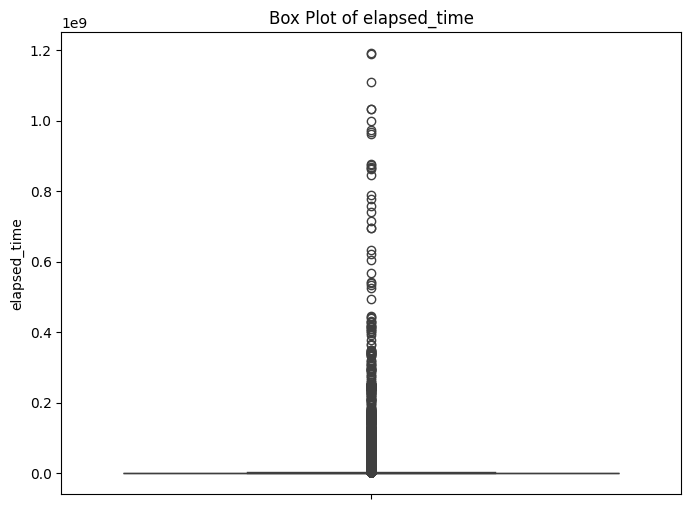

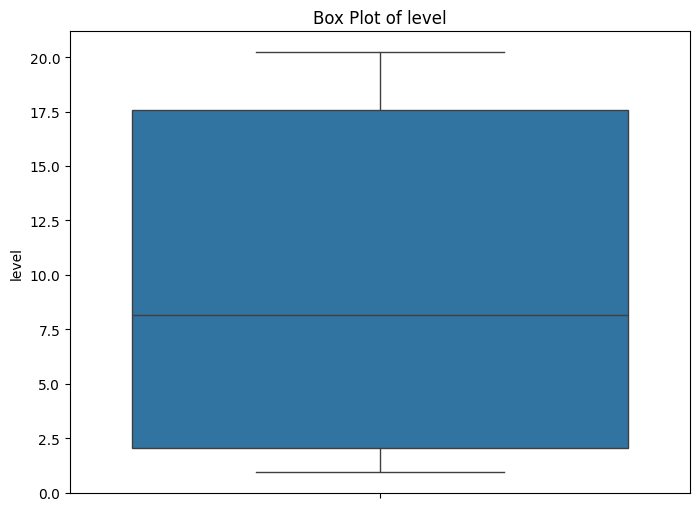

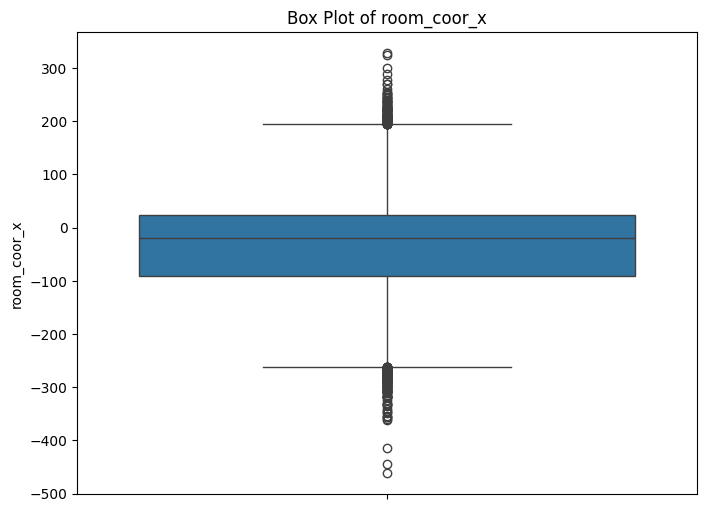

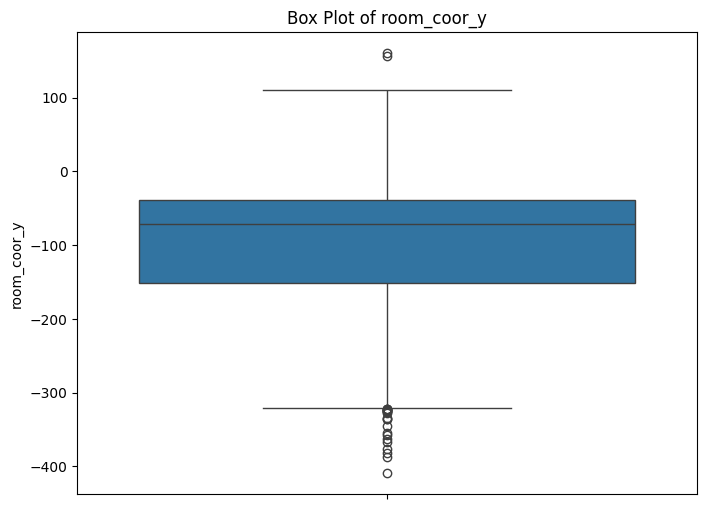

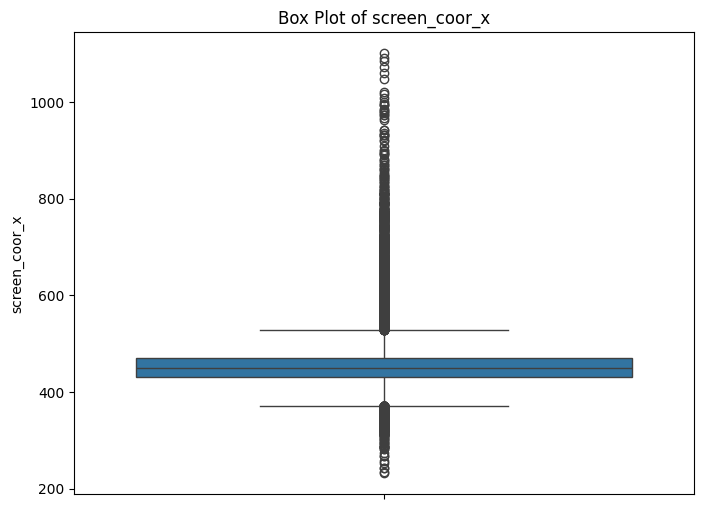

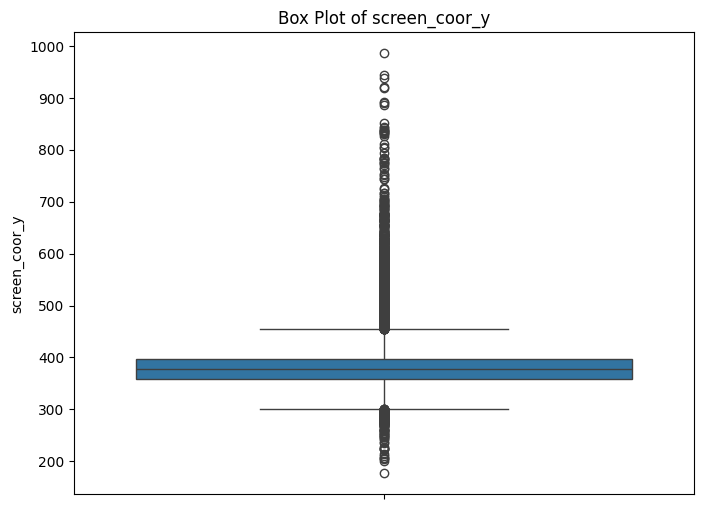

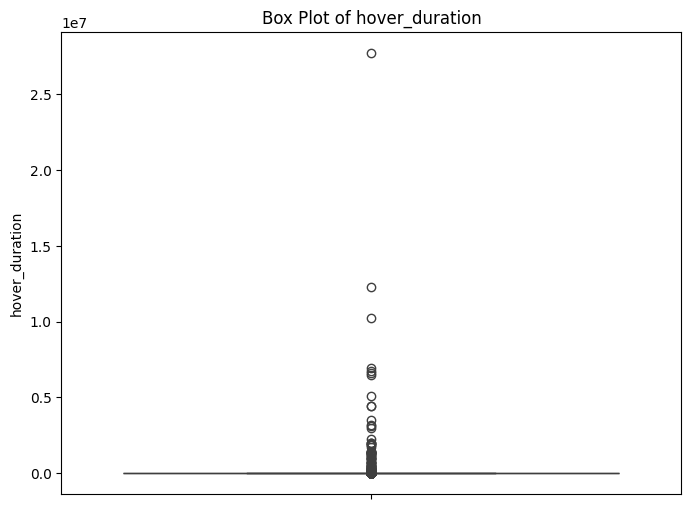

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical features
NUMERICAL = ['elapsed_time', 'level', 'room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y', 'hover_duration']

# Plot box plots for each numerical feature to check for outliers
for col in NUMERICAL:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=dataset_df, y=col)
    plt.title(f"Box Plot of {col}")
    plt.ylabel(col)
    plt.show()


In [16]:
import pandas as pd

# Function to detect outliers using the IQR method
def detect_outliers(df, col):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile Range

    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

# Create a copy of the original DataFrame to remove outliers from
cleaned_df = dataset_df.copy()

# List of numerical features
NUMERICAL = ['elapsed_time', 'level', 'room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y', 'hover_duration']

# Dictionary to store outliers for each numerical feature
outliers_dict = {}

# Set to store all outlier indices
outlier_indices = set()

# Loop through each numerical feature, detect outliers, and store the indices
for col in NUMERICAL:
    outliers = detect_outliers(dataset_df, col)
    outliers_dict[col] = outliers
    
    # Add outlier indices to the set
    outlier_indices.update(outliers.index.tolist())
    
    # Print the number of outliers and sample outliers
    print(f"\nFeature: {col}")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Outlier indices: {outliers.index.tolist()[:10]}")  # Display first 10 outlier indices

# Remove all outliers from the cleaned DataFrame
cleaned_df = cleaned_df.drop(index=outlier_indices)

# Display the shape of the original and cleaned DataFrame
print("\nOriginal Dataset Shape:", dataset_df.shape)
print("Cleaned Dataset Shape (after removing outliers):", cleaned_df.shape)



Feature: elapsed_time
Number of outliers: 4379
Outlier indices: [20090314363702160, 20090317111400710, 20090318322359292, 20090318322359292, 20090320140443148, 20100009314461780, 20100009314461780, 20100009385330468, 20100012540000424, 20100012540000424]

Feature: level
Number of outliers: 0
Outlier indices: []

Feature: room_coor_x
Number of outliers: 308
Outlier indices: [20100020201560770, 20100113302758190, 20100116221381640, 20100309331643590, 20100313142799820, 20100319050256450, 20100517073072136, 20100517073072136, 20100609235995304, 20100612522842116]

Feature: room_coor_y
Number of outliers: 24
Outlier indices: [20100414211746280, 21000313023836020, 21000409533052732, 21010311490246804, 21010313071173944, 21020416502739580, 21020512391529772, 21030113140554564, 21050222352480012, 21060114313500572]

Feature: screen_coor_x
Number of outliers: 3362
Outlier indices: [20090312433251036, 20090312455206810, 20090312455206810, 20090315085850788, 20090315085850788, 20090315085850788

Dataset Shape: (26296946, 20)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26296946 entries, 0 to 26296945
Data columns (total 20 columns):
 #   Column          Dtype   
---  ------          -----   
 0   session_id      int64   
 1   index           int64   
 2   elapsed_time    int32   
 3   event_name      category
 4   name            category
 5   level           uint8   
 6   page            float64 
 7   room_coor_x     float32 
 8   room_coor_y     float32 
 9   screen_coor_x   float32 
 10  screen_coor_y   float32 
 11  hover_duration  float32 
 12  text            category
 13  fqid            category
 14  room_fqid       category
 15  text_fqid       category
 16  fullscreen      category
 17  hq              category
 18  music           category
 19  level_group     category
dtypes: category(10), float32(5), float64(1), int32(1), int64(2), uint8(1)
memory usage: 1.5 GB

Missing Values by Feature:
session_id               0
index                 

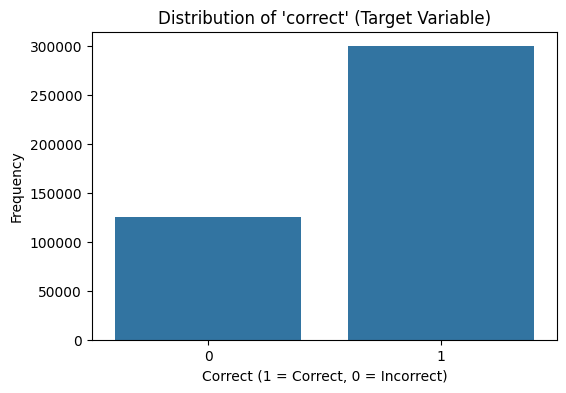


Numerical Feature Statistics:
       elapsed_time         level   room_coor_x   room_coor_y  screen_coor_x  \
count  2.629695e+07  2.629695e+07  2.422367e+07  2.422367e+07   2.422367e+07   
mean   4.016694e+06  1.219169e+01 -5.490582e+01 -1.162119e+02   4.584099e+02   
std    3.127032e+07  6.497789e+00  5.202926e+02  2.184710e+02   2.479389e+02   
min    0.000000e+00  0.000000e+00 -1.992355e+03 -9.181624e+02   0.000000e+00   
25%    4.397000e+05  6.000000e+00 -3.528395e+02 -2.127183e+02   2.690000e+02   
50%    1.014801e+06  1.300000e+01 -1.116280e+01 -9.760534e+01   4.470000e+02   
75%    1.747040e+06  1.800000e+01  2.966515e+02  2.268786e+01   6.630000e+02   
max    1.988607e+09  2.200000e+01  1.261774e+03  5.436164e+02   1.919000e+03   

       screen_coor_y  hover_duration  
count   2.422367e+07    2.002244e+06  
mean    3.855858e+02    3.471006e+03  
std     1.298166e+02    4.602024e+05  
min     0.000000e+00    0.000000e+00  
25%     3.040000e+02    9.900000e+01  
50%     3.9700

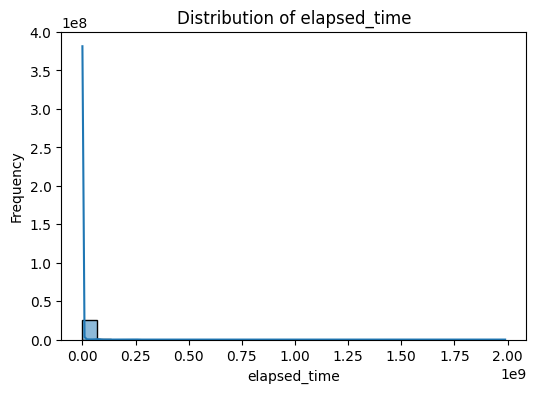

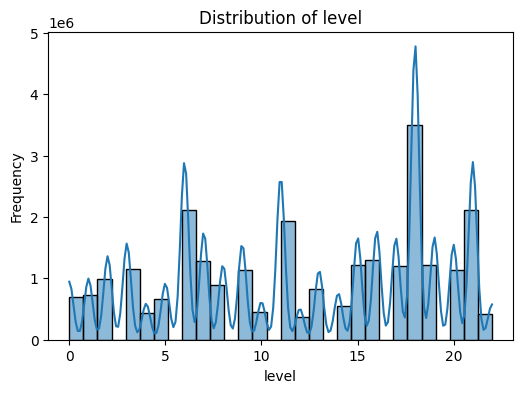

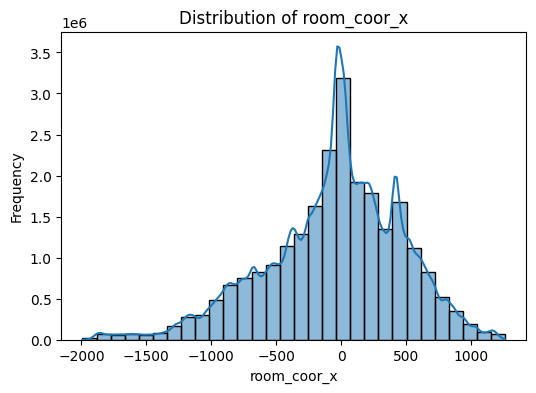

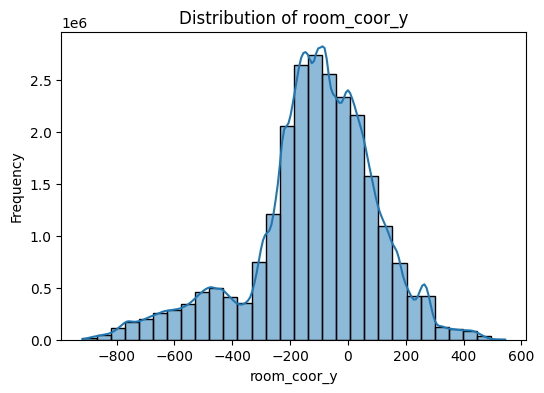

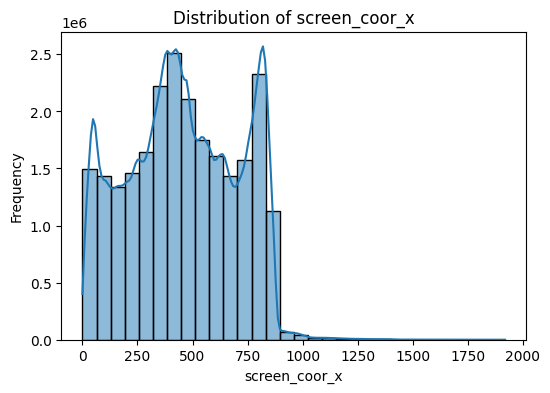

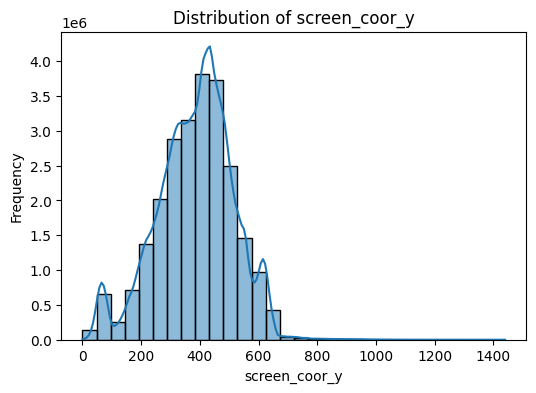

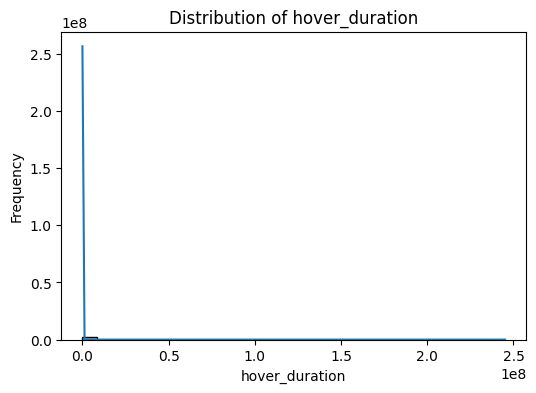


Value counts for categorical feature: event_name
event_name
navigate_click        11326433
person_click           6052853
cutscene_click         2703035
object_click           2198211
object_hover           1057085
map_hover               945159
notification_click      649001
notebook_click          564544
map_click               517242
observation_click       212355
Name: count, dtype: int64


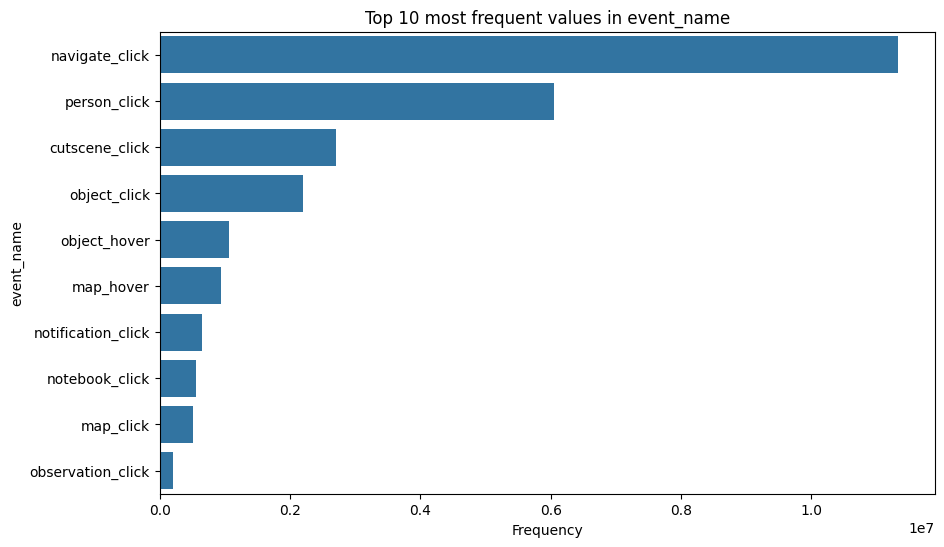


Value counts for categorical feature: name
name
undefined    12705785
basic        12648469
close          676696
open           235139
prev            19250
next            11607
Name: count, dtype: int64


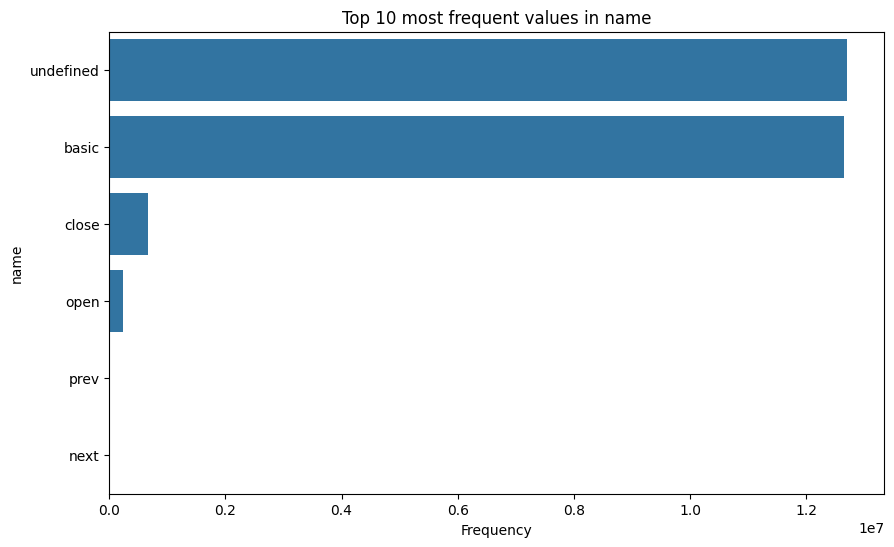


Value counts for categorical feature: fqid
fqid
worker           1878958
archivist        1127341
gramps           1122264
wells             787418
toentry           784496
confrontation     697098
crane_ranger      503927
groupconvo        455705
flag_girl         449742
tomap             403048
Name: count, dtype: int64


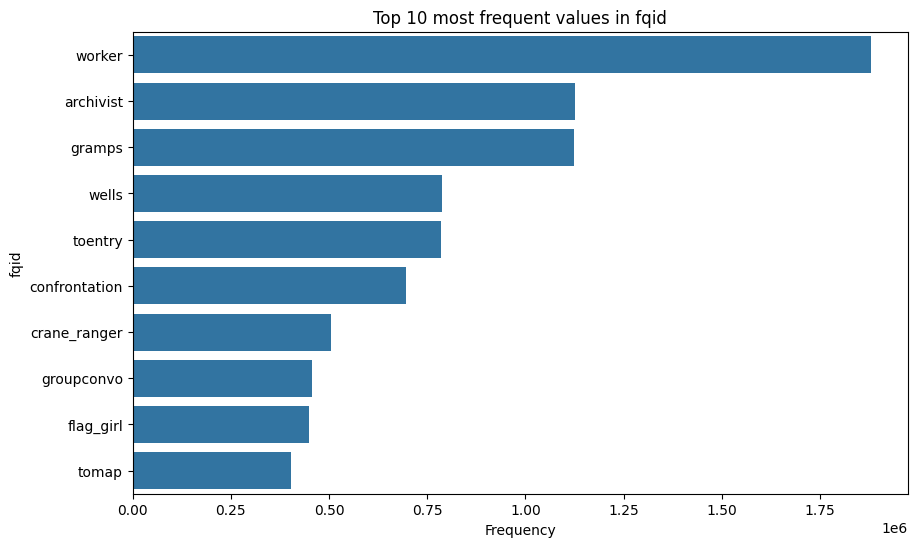


Value counts for categorical feature: room_fqid
room_fqid
tunic.historicalsociety.entry           3622003
tunic.wildlife.center                   3013154
tunic.historicalsociety.cage            2352083
tunic.library.frontdesk                 2145666
tunic.historicalsociety.frontdesk       1943066
tunic.historicalsociety.stacks          1794007
tunic.historicalsociety.closet_dirty    1568994
tunic.humanecology.frontdesk            1326890
tunic.historicalsociety.basement        1168090
tunic.kohlcenter.halloffame             1096872
Name: count, dtype: int64


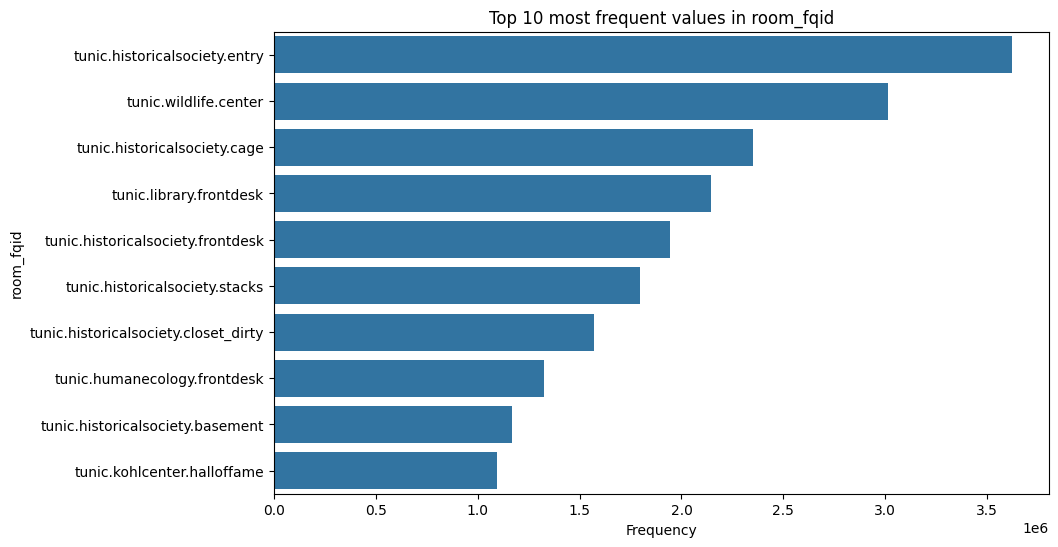


Value counts for categorical feature: text_fqid
text_fqid
tunic.historicalsociety.cage.confrontation                           666557
tunic.wildlife.center.crane_ranger.crane                             470755
tunic.historicalsociety.frontdesk.archivist.newspaper                429762
tunic.historicalsociety.entry.groupconvo                             427180
tunic.wildlife.center.wells.nodeer                                   399967
tunic.historicalsociety.frontdesk.archivist.have_glass               394908
tunic.drycleaner.frontdesk.worker.hub                                362883
tunic.historicalsociety.closet_dirty.gramps.news                     334439
tunic.humanecology.frontdesk.worker.intro                            300110
tunic.historicalsociety.frontdesk.archivist_glasses.confrontation    263308
Name: count, dtype: int64


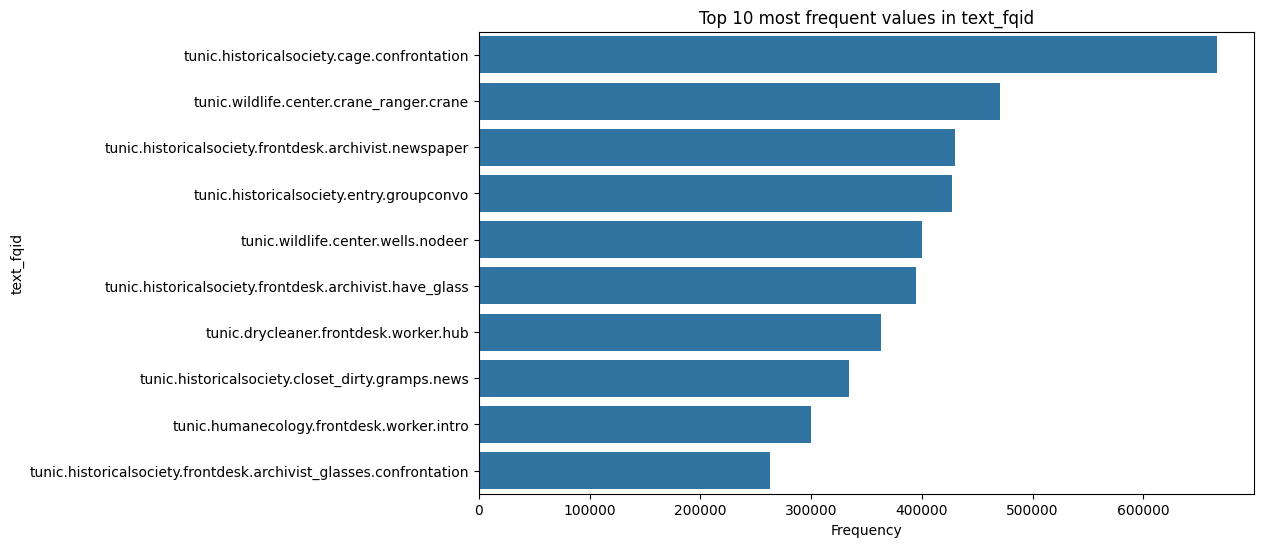

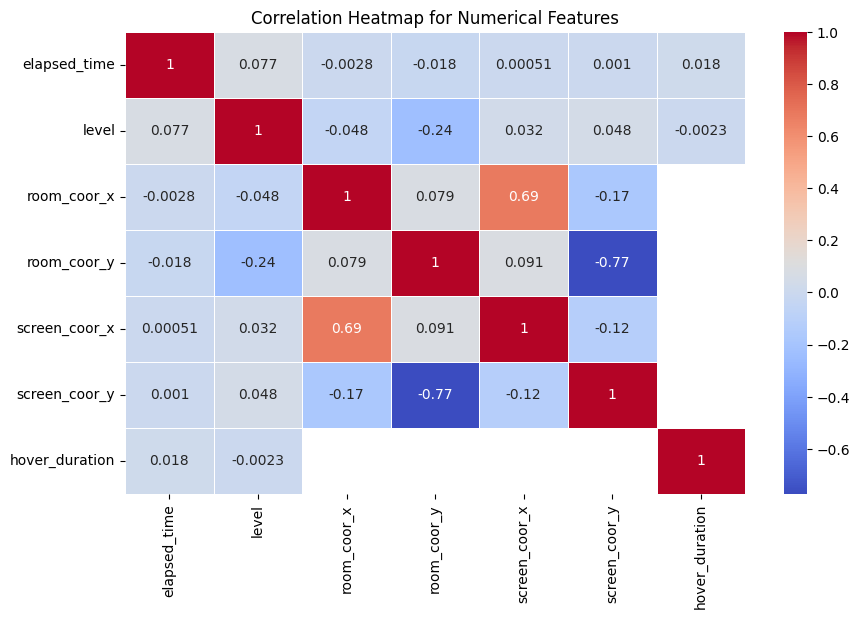

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Summary of the dataset
print("Dataset Shape:", dataset_df.shape)
print("\nDataset Information:")
dataset_df.info()

# 2. Check for missing values
print("\nMissing Values by Feature:")
print(dataset_df.isna().sum())

# 3. Distribution of target variable (correct) in the labels
plt.figure(figsize=(6, 4))
sns.countplot(data=labels, x='correct')
plt.title("Distribution of 'correct' (Target Variable)")
plt.xlabel('Correct (1 = Correct, 0 = Incorrect)')
plt.ylabel('Frequency')
plt.show()
# Feature Engineering
CATEGORICAL = ['event_name', 'name', 'fqid', 'room_fqid', 'text_fqid']
NUMERICAL = ['elapsed_time', 'level', 'room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y', 'hover_duration']

# 4. Descriptive statistics for numerical features
print("\nNumerical Feature Statistics:")
print(dataset_df[NUMERICAL].describe())

# Visualize distributions of numerical features
for col in NUMERICAL:
    plt.figure(figsize=(6, 4))
    sns.histplot(dataset_df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# 5. Explore categorical features: frequency counts
for col in CATEGORICAL:
    print(f"\nValue counts for categorical feature: {col}")
    print(dataset_df[col].value_counts().head(10))  # Display top 10 frequent categories
    plt.figure(figsize=(10, 6))
    sns.countplot(y=dataset_df[col], order=dataset_df[col].value_counts().iloc[:10].index)
    plt.title(f"Top 10 most frequent values in {col}")
    plt.xlabel("Frequency")
    plt.ylabel(col)
    plt.show()

# 6. Correlation matrix for numerical features
corr_matrix = dataset_df[NUMERICAL].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Numerical Features')
plt.show()


In [45]:
import pandas as pd
df = pd.read_csv('train_labels.csv')
df[['session', 'q']] = df['session_id'].str.split('_q', expand=True)
labelss = df[['session', 'q', 'correct']].copy()
labelss.rename(columns={'session': 'session_id'}, inplace=True)
print(labelss)
labelss.to_csv('answer.csv', index=False)


               session_id   q  correct
0       20090312431273200   1        1
1       20090312433251036   1        0
2       20090312455206810   1        1
3       20090313091715820   1        0
4       20090313571836404   1        1
...                   ...  ..      ...
424111  22100215342220508  18        1
424112  22100215460321130  18        1
424113  22100217104993650  18        1
424114  22100219442786200  18        1
424115  22100221145014656  18        1

[424116 rows x 3 columns]


In [47]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# # Load the dataset
# dtypes = {
#     'elapsed_time': np.int32,
#     'event_name': 'category',
#     'name': 'category',
#     'level': np.uint8,
#     'room_coor_x': np.float32,
#     'room_coor_y': np.float32,
#     'screen_coor_x': np.float32,
#     'screen_coor_y': np.float32,
#     'hover_duration': np.float32,
#     'text': 'category',
#     'fqid': 'category',
#     'room_fqid': 'category',
#     'text_fqid': 'category',
#     'fullscreen': 'category',
#     'hq': 'category',
#     'music': 'category', n 
#     'level_group': 'category'
# }

dataset_df = pd.read_csv('train.csv', dtype=dtypes)



In [35]:
dataset_df.dtypes


session_id           int64
index                int64
elapsed_time         int32
event_name        category
name              category
level                uint8
page               float64
room_coor_x        float32
room_coor_y        float32
screen_coor_x      float32
screen_coor_y      float32
hover_duration     float32
text              category
fqid              category
room_fqid         category
text_fqid         category
fullscreen        category
hq                category
music             category
level_group       category
dtype: object

In [36]:
# Load the labels
labels = pd.read_csv('train_labels.csv')
labels['session'] = labels.session_id.apply(lambda x: int(x.split('_')[0]))
labels['q'] = labels.session_id.apply(lambda x: int(x.split('_')[-1][1:]))
print(labels)


                   session_id  correct            session   q
0        20090312431273200_q1        1  20090312431273200   1
1        20090312433251036_q1        0  20090312433251036   1
2        20090312455206810_q1        1  20090312455206810   1
3        20090313091715820_q1        0  20090313091715820   1
4        20090313571836404_q1        1  20090313571836404   1
...                       ...      ...                ...  ..
424111  22100215342220508_q18        1  22100215342220508  18
424112  22100215460321130_q18        1  22100215460321130  18
424113  22100217104993650_q18        1  22100217104993650  18
424114  22100219442786200_q18        1  22100219442786200  18
424115  22100221145014656_q18        1  22100221145014656  18

[424116 rows x 4 columns]


In [48]:
# Feature Engineering
# CATEGORICAL = ['event_name', 'name', 'fqid', 'room_fqid', 'text_fqid']
# NUMERICAL = ['elapsed_time', 'level', 'room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y', 'hover_duration']
NUMERICAL = dataset_df.select_dtypes(include=['int64', 'int32', 'uint8', 'float32', 'float64']).columns.tolist()
CATEGORICAL = dataset_df.select_dtypes(include=['category']).columns.tolist()
# print(CATEGORICAL)
# print(NUMERICAL)
categorical_to_remove = ['text', 'hq', 'music', 'fullscreen', 'level_group']
numerical_to_remove = ['index', 'page', 'session_id', 'room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y']

# Remove items from CATEGORICAL list
for item in categorical_to_remove:
    if item in CATEGORICAL:  # Check if the item exists before removing
        CATEGORICAL.remove(item)

# Remove items from NUMERICAL list
for item in numerical_to_remove:
    if item in NUMERICAL:  # Check if the item exists before removing
        NUMERICAL.remove(item)

print(CATEGORICAL)
print(NUMERICAL)
def feature_engineer(dataset_df):
    dfs = []
    # for c in CATEGORICAL:
    #     tmp = dataset_df.groupby(['session_id', 'level_group'])[c].agg('nunique')
    #     dfs.append(tmp)
    for c in NUMERICAL:
        tmp = dataset_df.groupby(['session_id', 'level_group'])[c].agg('mean')
        dfs.append(tmp)
    # for c in NUMERICAL:
    #     tmp = dataset_df.groupby(['session_id', 'level_group'])[c].agg('std')
    #     dfs.append(tmp)
    dataset_df = pd.concat(dfs, axis=1).fillna(-1).reset_index().set_index('session_id')
    return dataset_df

dataset_df = feature_engineer(dataset_df)
print(f"data {dataset_df}")
def split_dataset(dataset, test_ratio=0.20):
    USER_LIST = dataset.index.unique()
    split = int(len(USER_LIST) * (1 - test_ratio))
    return dataset.loc[USER_LIST[:split]], dataset.loc[USER_LIST[split:]]

train_x, valid_x = split_dataset(dataset_df)
print("{} examples in training, {} examples in testing.".format(
    len(train_x), len(valid_x)))

# Prepare for model training
VALID_USER_LIST = valid_x.index.unique()
prediction_df = pd.DataFrame(data=np.zeros((len(VALID_USER_LIST), 18)), index=VALID_USER_LIST)
models = {}
evaluation_dict = {}
print(train_x)
print(valid_x)
from sklearn.tree import DecisionTreeClassifier
# Train models for each question           
for q_no in range(1, 19):
    # Select level group for each question
    if q_no <= 3:
        grp = '0-4'
    elif q_no <= 13:
        grp = '5-12'
    else:
        grp = '13-22'
    
    # Filter datasets
    train_df = train_x.loc[train_x.level_group == grp]
    train_users = train_df.index.values
    valid_df = valid_x.loc[valid_x.level_group == grp]
    valid_users = valid_df.index.values

    # Get labels for each question
    train_labels = labels.loc[labels.q == q_no].set_index('session').loc[train_users]
    valid_labels = labels.loc[labels.q == q_no].set_index('session').loc[valid_users]

    train_df["correct"] = train_labels["correct"]
    valid_df["correct"] = valid_labels["correct"]

    X_train = train_df.loc[:, train_df.columns != 'level_group'].drop(columns=["correct"])
    y_train = train_df["correct"]

    X_valid = valid_df.loc[:, valid_df.columns != 'level_group'].drop(columns=["correct"])
    y_valid = valid_df["correct"]

    rf_classifier =DecisionTreeClassifier(random_state=42)

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)
    evaluation_dict[q_no] = accuracy

# Print accuracy for each question and average accuracy
for name, value in evaluation_dict.items():
    print(f"Question {name}: Accuracy {value:.4f}")

print("\nAverage accuracy:", sum(evaluation_dict.values()) / 18)


['event_name', 'name', 'fqid', 'room_fqid', 'text_fqid']
['elapsed_time', 'level', 'hover_duration']


C:\Users\siddh\AppData\Local\Temp\ipykernel_14100\3728417148.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp = dataset_df.groupby(['session_id', 'level_group'])[c].agg('mean')


data                   level_group  elapsed_time      level  hover_duration
session_id                                                            
20090312431273200         0-4  8.579356e+04   1.945455     2389.500000
20090312431273200       13-22  1.040601e+06  17.402381      899.925903
20090312431273200        5-12  3.572052e+05   8.054054      969.333313
20090312433251036         0-4  9.763342e+04   1.870504     1378.750000
20090312433251036       13-22  2.498852e+06  17.762529      720.384949
...                       ...           ...        ...             ...
22100219442786200       13-22  9.619192e+05  17.671395     1110.500000
22100219442786200        5-12  3.866058e+05   8.111511     1328.250000
22100221145014656         0-4  2.036104e+05   2.061611     4164.636230
22100221145014656       13-22  4.899580e+06  18.127632      669.000000
22100221145014656        5-12  2.058366e+06   8.338542     1901.327881

[70686 rows x 4 columns]
56547 examples in training, 14139 examples in 

C:\Users\siddh\AppData\Local\Temp\ipykernel_14100\3728417148.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_14100\3728417148.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_14100\3728417148.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

Question 1: Accuracy 0.6128
Question 2: Accuracy 0.9542
Question 3: Accuracy 0.8721
Question 4: Accuracy 0.6841
Question 5: Accuracy 0.5271
Question 6: Accuracy 0.6809
Question 7: Accuracy 0.6227
Question 8: Accuracy 0.5419
Question 9: Accuracy 0.6351
Question 10: Accuracy 0.5124
Question 11: Accuracy 0.5506
Question 12: Accuracy 0.7685
Question 13: Accuracy 0.6117
Question 14: Accuracy 0.6092
Question 15: Accuracy 0.5292
Question 16: Accuracy 0.6083
Question 17: Accuracy 0.5801
Question 18: Accuracy 0.9098

Average accuracy: 0.65614022679586


In [38]:
def split_dataset(dataset, test_ratio=0.20):
    USER_LIST = dataset.index.unique()
    split = int(len(USER_LIST) * (1 - test_ratio))
    return dataset.loc[USER_LIST[:split]], dataset.loc[USER_LIST[split:]]

train_x, valid_x = split_dataset(dataset_df)
print("{} examples in training, {} examples in testing.".format(
    len(train_x), len(valid_x)))

# Prepare for model training
VALID_USER_LIST = valid_x.index.unique()
prediction_df = pd.DataFrame(data=np.zeros((len(VALID_USER_LIST), 18)), index=VALID_USER_LIST)
models = {}
evaluation_dict = {}
print(train_x)
print(valid_x)
from sklearn.tree import DecisionTreeClassifier
# Train models for each question           
for q_no in range(1, 19):
    # Select level group for each question
    if q_no <= 3:
        grp = '0-4'
    elif q_no <= 13:
        grp = '5-12'
    else:
        grp = '13-22'
    
    # Filter datasets
    train_df = train_x.loc[train_x.level_group == grp]
    train_users = train_df.index.values
    valid_df = valid_x.loc[valid_x.level_group == grp]
    valid_users = valid_df.index.values

    # Get labels for each question
    train_labels = labels.loc[labels.q == q_no].set_index('session').loc[train_users]
    valid_labels = labels.loc[labels.q == q_no].set_index('session').loc[valid_users]

    train_df["correct"] = train_labels["correct"]
    valid_df["correct"] = valid_labels["correct"]

    X_train = train_df.loc[:, train_df.columns != 'level_group'].drop(columns=["correct"])
    y_train = train_df["correct"]

    X_valid = valid_df.loc[:, valid_df.columns != 'level_group'].drop(columns=["correct"])
    y_valid = valid_df["correct"]

    rf_classifier =DecisionTreeClassifier(random_state=42)

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)
    evaluation_dict[q_no] = accuracy

# Print accuracy for each question and average accuracy
for name, value in evaluation_dict.items():
    print(f"Question {name}: Accuracy {value:.4f}")

print("\nAverage accuracy:", sum(evaluation_dict.values()) / 18)


56547 examples in training, 14139 examples in testing.
                  level_group  event_name  name  fqid  room_fqid  text_fqid  \
session_id                                                                    
20090312431273200         0-4          10     3    30          7         17   
20090312431273200       13-22          10     3    49         12         35   
20090312431273200        5-12          10     3    39         11         24   
20090312433251036         0-4          11     4    22          6         11   
20090312433251036       13-22          11     6    73         16         43   
...                       ...         ...   ...   ...        ...        ...   
22000319145510864       13-22          11     4    49         12         32   
22000319145510864        5-12          11     4    41         11         25   
22000319365553870         0-4          10     4    21          6         12   
22000319365553870       13-22          11     4    53         13         31 

C:\Users\siddh\AppData\Local\Temp\ipykernel_14100\2919292368.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_14100\2919292368.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_14100\2919292368.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

Question 1: Accuracy 0.6028
Question 2: Accuracy 0.9491
Question 3: Accuracy 0.8733
Question 4: Accuracy 0.6923
Question 5: Accuracy 0.5425
Question 6: Accuracy 0.6665
Question 7: Accuracy 0.6276
Question 8: Accuracy 0.5423
Question 9: Accuracy 0.6488
Question 10: Accuracy 0.5211
Question 11: Accuracy 0.5512
Question 12: Accuracy 0.7602
Question 13: Accuracy 0.6036
Question 14: Accuracy 0.6058
Question 15: Accuracy 0.5374
Question 16: Accuracy 0.6247
Question 17: Accuracy 0.5761
Question 18: Accuracy 0.9052

Average accuracy: 0.6572600608246693


In [27]:
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                               'Parrot', 'Parrot'],
                    'Max Speed': [380., 370., 24., 26.]})

df.groupby(['Animal']).mean()


,Max Speed
Animal,
Falcon,375.0
Parrot,25.0


In [51]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
dtypes = {
    'elapsed_time': np.int32,
    'event_name': 'category',
    'name': 'category',
    'level': np.uint8,
    'room_coor_x': np.float32,
    'room_coor_y': np.float32,
    'screen_coor_x': np.float32,
    'screen_coor_y': np.float32,
    'hover_duration': np.float32,
    'text': 'category',
    'fqid': 'category',
    'room_fqid': 'category',
    'text_fqid': 'category',
    'fullscreen': 'category',
    'hq': 'category',
    'music': 'category',
    'level_group': 'category'
}

data = pd.read_csv('train.csv', dtype=dtypes)


In [20]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the dataset
dataset_df = data.copy()

# Load the labels
labels = pd.read_csv('train_labels.csv')
labels['session'] = labels.session_id.apply(lambda x: int(x.split('_')[0]))
labels['q'] = labels.session_id.apply(lambda x: int(x.split('_')[-1][1:]))

# Feature Engineering
NUMERICAL = ['elapsed_time', 'level', 'hover_duration']

def feature_engineer(dataset_df):
    dfs = []
    for c in NUMERICAL:
        tmp = dataset_df.groupby(['session_id', 'level_group'])[c].agg('mean')
        dfs.append(tmp)
    dataset_df = pd.concat(dfs, axis=1).fillna(-1).reset_index().set_index('session_id')
    return dataset_df

dataset_df = feature_engineer(dataset_df)

def split_dataset(dataset, test_ratio=0.20):
    USER_LIST = dataset.index.unique()
    split = int(len(USER_LIST) * (1 - test_ratio))
    return dataset.loc[USER_LIST[:split]], dataset.loc[USER_LIST[split:]]

train_x, valid_x = split_dataset(dataset_df)

evaluation_dict = {}

# Train models for each question
for q_no in range(1, 19):
    # Select level group for each question
    if q_no <= 3:
        grp = '0-4'
    elif q_no <= 13:
        grp = '5-12'
    else:
        grp = '13-22'
    
    # Filter datasets
    train_df = train_x.loc[train_x.level_group == grp]
    valid_df = valid_x.loc[valid_x.level_group == grp]

    train_users = train_df.index.values
    valid_users = valid_df.index.values

    # Get labels for each question
    train_labels = labels.loc[labels.q == q_no].set_index('session').loc[train_users]
    valid_labels = labels.loc[labels.q == q_no].set_index('session').loc[valid_users]

    # Add correct labels to dataset
    train_df["correct"] = train_labels["correct"]
    valid_df["correct"] = valid_labels["correct"]

    # Prepare features and labels for training
    X_train = train_df.loc[:, train_df.columns != 'level_group'].drop(columns=["correct"])
    y_train = train_df["correct"]

    X_valid = valid_df.loc[:, valid_df.columns != 'level_group'].drop(columns=["correct"])
    y_valid = valid_df["correct"]

    # Initialize and train Logistic Regression
    lr_classifier = LogisticRegression(max_iter=1000, random_state=42)
    lr_classifier.fit(X_train, y_train)

    # Make predictions and evaluate accuracy for Logistic Regression
    y_pred_lr = lr_classifier.predict(X_valid)
    accuracy_lr = accuracy_score(y_valid, y_pred_lr)
    evaluation_dict[f'Logistic Regression - Q{q_no}'] = accuracy_lr

    # Initialize and train Naive Bayes Classifier
    nb_classifier = GaussianNB()
    nb_classifier.fit(X_train, y_train)

    # Make predictions and evaluate accuracy for Naive Bayes
    y_pred_nb = nb_classifier.predict(X_valid)
    accuracy_nb = accuracy_score(y_valid, y_pred_nb)
    evaluation_dict[f'Naive Bayes - Q{q_no}'] = accuracy_nb

    # Initialize and train Decision Tree Classifier
    dt_classifier = DecisionTreeClassifier(random_state=42)
    dt_classifier.fit(X_train, y_train)

    # Make predictions and evaluate accuracy for Decision Tree
    y_pred_dt = dt_classifier.predict(X_valid)
    accuracy_dt = accuracy_score(y_valid, y_pred_dt)
    evaluation_dict[f'Decision Tree - Q{q_no}'] = accuracy_dt

    # Initialize and train Random Forest Classifier
    rf_classifier = RandomForestClassifier(random_state=42)
    rf_classifier.fit(X_train, y_train)

    # Make predictions and evaluate accuracy for Random Forest
    y_pred_rf = rf_classifier.predict(X_valid)
    accuracy_rf = accuracy_score(y_valid, y_pred_rf)
    evaluation_dict[f'Random Forest - Q{q_no}'] = accuracy_rf

# Print accuracy for each question and average accuracy
for name, value in evaluation_dict.items():
    print(f"{name}: Accuracy {value:.4f}")

# Calculate average accuracy for all classifiers
lr_avg_accuracy = sum(value for name, value in evaluation_dict.items() if 'Logistic Regression' in name) / 18
nb_avg_accuracy = sum(value for name, value in evaluation_dict.items() if 'Naive Bayes' in name) / 18
dt_avg_accuracy = sum(value for name, value in evaluation_dict.items() if 'Decision Tree' in name) / 18
rf_avg_accuracy = sum(value for name, value in evaluation_dict.items() if 'Random Forest' in name) / 18

print("\nAverage accuracy for Logistic Regression:", lr_avg_accuracy)
print("Average accuracy for Naive Bayes:", nb_avg_accuracy)
print("Average accuracy for Decision Tree:", dt_avg_accuracy)
print("Average accuracy for Random Forest:", rf_avg_accuracy)


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\1722367420.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\1722367420.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\1722367420.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Logistic Regression - Q1: Accuracy 0.7322
Naive Bayes - Q1: Accuracy 0.7310
Decision Tree - Q1: Accuracy 0.6128
Random Forest - Q1: Accuracy 0.7027
Logistic Regression - Q2: Accuracy 0.9756
Naive Bayes - Q2: Accuracy 0.9756
Decision Tree - Q2: Accuracy 0.9542
Random Forest - Q2: Accuracy 0.9756
Logistic Regression - Q3: Accuracy 0.9351
Naive Bayes - Q3: Accuracy 0.9349
Decision Tree - Q3: Accuracy 0.8721
Random Forest - Q3: Accuracy 0.9330
Logistic Regression - Q4: Accuracy 0.7914
Naive Bayes - Q4: Accuracy 0.7842
Decision Tree - Q4: Accuracy 0.6841
Random Forest - Q4: Accuracy 0.7766
Logistic Regression - Q5: Accuracy 0.5557
Naive Bayes - Q5: Accuracy 0.5532
Decision Tree - Q5: Accuracy 0.5271
Random Forest - Q5: Accuracy 0.5642
Logistic Regression - Q6: Accuracy 0.7868
Naive Bayes - Q6: Accuracy 0.7804
Decision Tree - Q6: Accuracy 0.6809
Random Forest - Q6: Accuracy 0.7670
Logistic Regression - Q7: Accuracy 0.7458
Naive Bayes - Q7: Accuracy 0.7405
Decision Tree - Q7: Accuracy 0.6227


In [2]:
import pandas as pd

data=pd.read_csv('train.csv')

In [12]:
import pandas as pd
import numpy as np
from itertools import combinations
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the data (assuming dataset_df and labels are already defined)
dataset_df = data.copy()
# labels = pd.read_csv('train_labels.csv')

# Define NUMERICAL features
NUMERICAL = ['elapsed_time', 'level', 'room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y', 'hover_duration']

def feature_engineer(dataset_df, listn):
    dfs = []
    for c in listn:
        tmp = dataset_df.groupby(['session_id', 'level_group'])[c].agg('mean')
        dfs.append(tmp)
    dataset_df = pd.concat(dfs, axis=1).fillna(-1).reset_index().set_index('session_id')
    return dataset_df

# Split dataset function
def split_dataset(dataset, test_ratio=0.20):
    USER_LIST = dataset.index.unique()
    split = int(len(USER_LIST) * (1 - test_ratio))
    return dataset.loc[USER_LIST[:split]], dataset.loc[USER_LIST[split:]]

# Load the labels
labels = pd.read_csv('train_labels.csv')
labels['session'] = labels.session_id.apply(lambda x: int(x.split('_')[0]))
labels['q'] = labels.session_id.apply(lambda x: int(x.split('_')[-1][1:]))

# Open a text file to write the results
    # Loop through each combination of numerical features
f = open("madrchod.txt", "w")
f.close()
for r in range(1, len(NUMERICAL) + 1):  # Change range to control the size of combinations
# with open("madrchod.txt", "w") as f:
        for selected_combination in combinations(NUMERICAL, r):
            f = open("madrchod.txt", "a")
            print(f"Evaluating combination: {selected_combination}")

            total_accuracy_dt = 0
            total_accuracy_lr = 0
            total_accuracy_nb = 0
            dataset_df = data.copy()
            # Feature engineering on the selected combination
            dataset_df = feature_engineer(dataset_df, selected_combination)
            train_x, valid_x = split_dataset(dataset_df)

            # Train models for each question
            for q_no in range(1, 19):
                # Select level group for each question
                if q_no <= 3:
                    grp = '0-4'
                elif q_no <= 13:
                    grp = '5-12'
                else:
                    grp = '13-22'
                
                # Filter datasets
                train_df = train_x.loc[train_x.level_group == grp]
                valid_df = valid_x.loc[valid_x.level_group == grp]

                train_users = train_df.index.values
                valid_users = valid_df.index.values

                # Get labels for each question
                train_labels = labels.loc[labels.q == q_no].set_index('session').loc[train_users]
                valid_labels = labels.loc[labels.q == q_no].set_index('session').loc[valid_users]

                # Add correct labels to dataset
                train_df["correct"] = train_labels["correct"]
                valid_df["correct"] = valid_labels["correct"]

                # Prepare features and labels for training
                X_train = train_df.loc[:, train_df.columns != 'level_group'].drop(columns=["correct"])
                y_train = train_df["correct"]

                X_valid = valid_df.loc[:, valid_df.columns != 'level_group'].drop(columns=["correct"])
                y_valid = valid_df["correct"]

                # Initialize Decision Tree Classifier
                dt_classifier = DecisionTreeClassifier(random_state=42)
                # Train the Decision Tree model
                dt_classifier.fit(X_train, y_train)

                # Make predictions and evaluate accuracy for Decision Tree
                y_pred_dt = dt_classifier.predict(X_valid)
                accuracy_dt = accuracy_score(y_valid, y_pred_dt)
                total_accuracy_dt += accuracy_dt

                # Initialize Logistic Regression
                lr_classifier = LogisticRegression(max_iter=1000, random_state=42)
                # Train the Logistic Regression model
                lr_classifier.fit(X_train, y_train)

                # Make predictions and evaluate accuracy for Logistic Regression
                y_pred_lr = lr_classifier.predict(X_valid)
                accuracy_lr = accuracy_score(y_valid, y_pred_lr)
                total_accuracy_lr += accuracy_lr

                # Initialize Naive Bayes Classifier
                nb_classifier = GaussianNB()
                # Train the Naive Bayes model
                nb_classifier.fit(X_train, y_train)

                # Make predictions and evaluate accuracy for Naive Bayes
                y_pred_nb = nb_classifier.predict(X_valid)
                accuracy_nb = accuracy_score(y_valid, y_pred_nb)
                total_accuracy_nb += accuracy_nb

            # Calculate and print the average accuracy for all classifiers
            average_accuracy_dt = total_accuracy_dt / 18
            average_accuracy_lr = total_accuracy_lr / 18
            average_accuracy_nb = total_accuracy_nb / 18

            print(f"Average accuracy for combination {selected_combination} - Decision Tree: {average_accuracy_dt:.4f}, Logistic Regression: {average_accuracy_lr:.4f}, Naive Bayes: {average_accuracy_nb:.4f}")

            # Write the results to the text file
            f.write(f"Combination: {selected_combination}, Decision Tree Accuracy: {average_accuracy_dt:.4f}, Logistic Regression Accuracy: {average_accuracy_lr:.4f}, Naive Bayes Accuracy: {average_accuracy_nb:.4f}\n")
            f.close()


Evaluating combination: ('elapsed_time',)


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time',) - Decision Tree: 0.6519, Logistic Regression: 0.7332, Naive Bayes: 0.7350
Evaluating combination: ('level',)


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('level',) - Decision Tree: 0.6527, Logistic Regression: 0.7456, Naive Bayes: 0.7446
Evaluating combination: ('room_coor_x',)


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('room_coor_x',) - Decision Tree: 0.6464, Logistic Regression: 0.7405, Naive Bayes: 0.7407
Evaluating combination: ('room_coor_y',)


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('room_coor_y',) - Decision Tree: 0.6447, Logistic Regression: 0.7389, Naive Bayes: 0.7389
Evaluating combination: ('screen_coor_x',)


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('screen_coor_x',) - Decision Tree: 0.6464, Logistic Regression: 0.7389, Naive Bayes: 0.7382
Evaluating combination: ('screen_coor_y',)


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('screen_coor_y',) - Decision Tree: 0.6461, Logistic Regression: 0.7391, Naive Bayes: 0.7379
Evaluating combination: ('hover_duration',)


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('hover_duration',) - Decision Tree: 0.6558, Logistic Regression: 0.7394, Naive Bayes: 0.6756
Evaluating combination: ('elapsed_time', 'level')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'level') - Decision Tree: 0.6545, Logistic Regression: 0.7393, Naive Bayes: 0.7350
Evaluating combination: ('elapsed_time', 'room_coor_x')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'room_coor_x') - Decision Tree: 0.6460, Logistic Regression: 0.7112, Naive Bayes: 0.7350
Evaluating combination: ('elapsed_time', 'room_coor_y')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'room_coor_y') - Decision Tree: 0.6485, Logistic Regression: 0.7321, Naive Bayes: 0.7350
Evaluating combination: ('elapsed_time', 'screen_coor_x')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'screen_coor_x') - Decision Tree: 0.6507, Logistic Regression: 0.7393, Naive Bayes: 0.7350
Evaluating combination: ('elapsed_time', 'screen_coor_y')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'screen_coor_y') - Decision Tree: 0.6483, Logistic Regression: 0.7393, Naive Bayes: 0.7350
Evaluating combination: ('elapsed_time', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'hover_duration') - Decision Tree: 0.6538, Logistic Regression: 0.7401, Naive Bayes: 0.6736
Evaluating combination: ('level', 'room_coor_x')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('level', 'room_coor_x') - Decision Tree: 0.6507, Logistic Regression: 0.7464, Naive Bayes: 0.7450
Evaluating combination: ('level', 'room_coor_y')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('level', 'room_coor_y') - Decision Tree: 0.6519, Logistic Regression: 0.7454, Naive Bayes: 0.7446
Evaluating combination: ('level', 'screen_coor_x')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('level', 'screen_coor_x') - Decision Tree: 0.6503, Logistic Regression: 0.7458, Naive Bayes: 0.7436
Evaluating combination: ('level', 'screen_coor_y')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('level', 'screen_coor_y') - Decision Tree: 0.6495, Logistic Regression: 0.7456, Naive Bayes: 0.7439
Evaluating combination: ('level', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('level', 'hover_duration') - Decision Tree: 0.6498, Logistic Regression: 0.7445, Naive Bayes: 0.6756
Evaluating combination: ('room_coor_x', 'room_coor_y')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('room_coor_x', 'room_coor_y') - Decision Tree: 0.6453, Logistic Regression: 0.7409, Naive Bayes: 0.7408
Evaluating combination: ('room_coor_x', 'screen_coor_x')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('room_coor_x', 'screen_coor_x') - Decision Tree: 0.6469, Logistic Regression: 0.7416, Naive Bayes: 0.7397
Evaluating combination: ('room_coor_x', 'screen_coor_y')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('room_coor_x', 'screen_coor_y') - Decision Tree: 0.6464, Logistic Regression: 0.7410, Naive Bayes: 0.7398
Evaluating combination: ('room_coor_x', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('room_coor_x', 'hover_duration') - Decision Tree: 0.6519, Logistic Regression: 0.7405, Naive Bayes: 0.6742
Evaluating combination: ('room_coor_y', 'screen_coor_x')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('room_coor_y', 'screen_coor_x') - Decision Tree: 0.6470, Logistic Regression: 0.7387, Naive Bayes: 0.7383
Evaluating combination: ('room_coor_y', 'screen_coor_y')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('room_coor_y', 'screen_coor_y') - Decision Tree: 0.6479, Logistic Regression: 0.7386, Naive Bayes: 0.7384
Evaluating combination: ('room_coor_y', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('room_coor_y', 'hover_duration') - Decision Tree: 0.6478, Logistic Regression: 0.7389, Naive Bayes: 0.6752
Evaluating combination: ('screen_coor_x', 'screen_coor_y')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('screen_coor_x', 'screen_coor_y') - Decision Tree: 0.6444, Logistic Regression: 0.7387, Naive Bayes: 0.7373
Evaluating combination: ('screen_coor_x', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('screen_coor_x', 'hover_duration') - Decision Tree: 0.6476, Logistic Regression: 0.7389, Naive Bayes: 0.6772
Evaluating combination: ('screen_coor_y', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('screen_coor_y', 'hover_duration') - Decision Tree: 0.6474, Logistic Regression: 0.7393, Naive Bayes: 0.6759
Evaluating combination: ('elapsed_time', 'level', 'room_coor_x')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'level', 'room_coor_x') - Decision Tree: 0.6504, Logistic Regression: 0.7370, Naive Bayes: 0.7350
Evaluating combination: ('elapsed_time', 'level', 'room_coor_y')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'level', 'room_coor_y') - Decision Tree: 0.6518, Logistic Regression: 0.7342, Naive Bayes: 0.7350
Evaluating combination: ('elapsed_time', 'level', 'screen_coor_x')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'level', 'screen_coor_x') - Decision Tree: 0.6515, Logistic Regression: 0.7395, Naive Bayes: 0.7350
Evaluating combination: ('elapsed_time', 'level', 'screen_coor_y')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'level', 'screen_coor_y') - Decision Tree: 0.6500, Logistic Regression: 0.7393, Naive Bayes: 0.7350
Evaluating combination: ('elapsed_time', 'level', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'level', 'hover_duration') - Decision Tree: 0.6561, Logistic Regression: 0.7393, Naive Bayes: 0.6736
Evaluating combination: ('elapsed_time', 'room_coor_x', 'room_coor_y')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'room_coor_x', 'room_coor_y') - Decision Tree: 0.6464, Logistic Regression: 0.7299, Naive Bayes: 0.7350
Evaluating combination: ('elapsed_time', 'room_coor_x', 'screen_coor_x')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'room_coor_x', 'screen_coor_x') - Decision Tree: 0.6503, Logistic Regression: 0.7405, Naive Bayes: 0.7350
Evaluating combination: ('elapsed_time', 'room_coor_x', 'screen_coor_y')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'room_coor_x', 'screen_coor_y') - Decision Tree: 0.6466, Logistic Regression: 0.7405, Naive Bayes: 0.7350
Evaluating combination: ('elapsed_time', 'room_coor_x', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'room_coor_x', 'hover_duration') - Decision Tree: 0.6528, Logistic Regression: 0.7171, Naive Bayes: 0.6736
Evaluating combination: ('elapsed_time', 'room_coor_y', 'screen_coor_x')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'room_coor_y', 'screen_coor_x') - Decision Tree: 0.6477, Logistic Regression: 0.7392, Naive Bayes: 0.7350
Evaluating combination: ('elapsed_time', 'room_coor_y', 'screen_coor_y')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'room_coor_y', 'screen_coor_y') - Decision Tree: 0.6456, Logistic Regression: 0.7392, Naive Bayes: 0.7350
Evaluating combination: ('elapsed_time', 'room_coor_y', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'room_coor_y', 'hover_duration') - Decision Tree: 0.6526, Logistic Regression: 0.7340, Naive Bayes: 0.6736
Evaluating combination: ('elapsed_time', 'screen_coor_x', 'screen_coor_y')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'screen_coor_x', 'screen_coor_y') - Decision Tree: 0.6460, Logistic Regression: 0.7393, Naive Bayes: 0.7350
Evaluating combination: ('elapsed_time', 'screen_coor_x', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'screen_coor_x', 'hover_duration') - Decision Tree: 0.6542, Logistic Regression: 0.7393, Naive Bayes: 0.6736
Evaluating combination: ('elapsed_time', 'screen_coor_y', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'screen_coor_y', 'hover_duration') - Decision Tree: 0.6531, Logistic Regression: 0.7393, Naive Bayes: 0.6736
Evaluating combination: ('level', 'room_coor_x', 'room_coor_y')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('level', 'room_coor_x', 'room_coor_y') - Decision Tree: 0.6522, Logistic Regression: 0.7459, Naive Bayes: 0.7447
Evaluating combination: ('level', 'room_coor_x', 'screen_coor_x')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('level', 'room_coor_x', 'screen_coor_x') - Decision Tree: 0.6503, Logistic Regression: 0.7462, Naive Bayes: 0.7439
Evaluating combination: ('level', 'room_coor_x', 'screen_coor_y')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('level', 'room_coor_x', 'screen_coor_y') - Decision Tree: 0.6462, Logistic Regression: 0.7466, Naive Bayes: 0.7445
Evaluating combination: ('level', 'room_coor_x', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('level', 'room_coor_x', 'hover_duration') - Decision Tree: 0.6520, Logistic Regression: 0.7435, Naive Bayes: 0.6749
Evaluating combination: ('level', 'room_coor_y', 'screen_coor_x')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('level', 'room_coor_y', 'screen_coor_x') - Decision Tree: 0.6507, Logistic Regression: 0.7457, Naive Bayes: 0.7436
Evaluating combination: ('level', 'room_coor_y', 'screen_coor_y')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('level', 'room_coor_y', 'screen_coor_y') - Decision Tree: 0.6486, Logistic Regression: 0.7452, Naive Bayes: 0.7441
Evaluating combination: ('level', 'room_coor_y', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('level', 'room_coor_y', 'hover_duration') - Decision Tree: 0.6501, Logistic Regression: 0.7454, Naive Bayes: 0.6756
Evaluating combination: ('level', 'screen_coor_x', 'screen_coor_y')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('level', 'screen_coor_x', 'screen_coor_y') - Decision Tree: 0.6488, Logistic Regression: 0.7452, Naive Bayes: 0.7432
Evaluating combination: ('level', 'screen_coor_x', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('level', 'screen_coor_x', 'hover_duration') - Decision Tree: 0.6499, Logistic Regression: 0.7457, Naive Bayes: 0.6774
Evaluating combination: ('level', 'screen_coor_y', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('level', 'screen_coor_y', 'hover_duration') - Decision Tree: 0.6505, Logistic Regression: 0.7447, Naive Bayes: 0.6760
Evaluating combination: ('room_coor_x', 'room_coor_y', 'screen_coor_x')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('room_coor_x', 'room_coor_y', 'screen_coor_x') - Decision Tree: 0.6447, Logistic Regression: 0.7415, Naive Bayes: 0.7400
Evaluating combination: ('room_coor_x', 'room_coor_y', 'screen_coor_y')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('room_coor_x', 'room_coor_y', 'screen_coor_y') - Decision Tree: 0.6439, Logistic Regression: 0.7412, Naive Bayes: 0.7401
Evaluating combination: ('room_coor_x', 'room_coor_y', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('room_coor_x', 'room_coor_y', 'hover_duration') - Decision Tree: 0.6475, Logistic Regression: 0.7408, Naive Bayes: 0.6750
Evaluating combination: ('room_coor_x', 'screen_coor_x', 'screen_coor_y')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('room_coor_x', 'screen_coor_x', 'screen_coor_y') - Decision Tree: 0.6457, Logistic Regression: 0.7414, Naive Bayes: 0.7392
Evaluating combination: ('room_coor_x', 'screen_coor_x', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('room_coor_x', 'screen_coor_x', 'hover_duration') - Decision Tree: 0.6478, Logistic Regression: 0.7407, Naive Bayes: 0.6754
Evaluating combination: ('room_coor_x', 'screen_coor_y', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('room_coor_x', 'screen_coor_y', 'hover_duration') - Decision Tree: 0.6455, Logistic Regression: 0.7406, Naive Bayes: 0.6739
Evaluating combination: ('room_coor_y', 'screen_coor_x', 'screen_coor_y')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('room_coor_y', 'screen_coor_x', 'screen_coor_y') - Decision Tree: 0.6468, Logistic Regression: 0.7388, Naive Bayes: 0.7372
Evaluating combination: ('room_coor_y', 'screen_coor_x', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('room_coor_y', 'screen_coor_x', 'hover_duration') - Decision Tree: 0.6455, Logistic Regression: 0.7389, Naive Bayes: 0.6766
Evaluating combination: ('room_coor_y', 'screen_coor_y', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('room_coor_y', 'screen_coor_y', 'hover_duration') - Decision Tree: 0.6453, Logistic Regression: 0.7388, Naive Bayes: 0.6755
Evaluating combination: ('screen_coor_x', 'screen_coor_y', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('screen_coor_x', 'screen_coor_y', 'hover_duration') - Decision Tree: 0.6470, Logistic Regression: 0.7387, Naive Bayes: 0.6774
Evaluating combination: ('elapsed_time', 'level', 'room_coor_x', 'room_coor_y')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'level', 'room_coor_x', 'room_coor_y') - Decision Tree: 0.6546, Logistic Regression: 0.7363, Naive Bayes: 0.7350
Evaluating combination: ('elapsed_time', 'level', 'room_coor_x', 'screen_coor_x')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'level', 'room_coor_x', 'screen_coor_x') - Decision Tree: 0.6498, Logistic Regression: 0.7414, Naive Bayes: 0.7350
Evaluating combination: ('elapsed_time', 'level', 'room_coor_x', 'screen_coor_y')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'level', 'room_coor_x', 'screen_coor_y') - Decision Tree: 0.6493, Logistic Regression: 0.7405, Naive Bayes: 0.7350
Evaluating combination: ('elapsed_time', 'level', 'room_coor_x', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'level', 'room_coor_x', 'hover_duration') - Decision Tree: 0.6574, Logistic Regression: 0.7387, Naive Bayes: 0.6736
Evaluating combination: ('elapsed_time', 'level', 'room_coor_y', 'screen_coor_x')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'level', 'room_coor_y', 'screen_coor_x') - Decision Tree: 0.6492, Logistic Regression: 0.7392, Naive Bayes: 0.7350
Evaluating combination: ('elapsed_time', 'level', 'room_coor_y', 'screen_coor_y')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'level', 'room_coor_y', 'screen_coor_y') - Decision Tree: 0.6508, Logistic Regression: 0.7393, Naive Bayes: 0.7350
Evaluating combination: ('elapsed_time', 'level', 'room_coor_y', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'level', 'room_coor_y', 'hover_duration') - Decision Tree: 0.6553, Logistic Regression: 0.7351, Naive Bayes: 0.6736
Evaluating combination: ('elapsed_time', 'level', 'screen_coor_x', 'screen_coor_y')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'level', 'screen_coor_x', 'screen_coor_y') - Decision Tree: 0.6485, Logistic Regression: 0.7393, Naive Bayes: 0.7350
Evaluating combination: ('elapsed_time', 'level', 'screen_coor_x', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'level', 'screen_coor_x', 'hover_duration') - Decision Tree: 0.6532, Logistic Regression: 0.7393, Naive Bayes: 0.6736
Evaluating combination: ('elapsed_time', 'level', 'screen_coor_y', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'level', 'screen_coor_y', 'hover_duration') - Decision Tree: 0.6552, Logistic Regression: 0.7393, Naive Bayes: 0.6736
Evaluating combination: ('elapsed_time', 'room_coor_x', 'room_coor_y', 'screen_coor_x')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'room_coor_x', 'room_coor_y', 'screen_coor_x') - Decision Tree: 0.6493, Logistic Regression: 0.7410, Naive Bayes: 0.7350
Evaluating combination: ('elapsed_time', 'room_coor_x', 'room_coor_y', 'screen_coor_y')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'room_coor_x', 'room_coor_y', 'screen_coor_y') - Decision Tree: 0.6491, Logistic Regression: 0.7408, Naive Bayes: 0.7350
Evaluating combination: ('elapsed_time', 'room_coor_x', 'room_coor_y', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'room_coor_x', 'room_coor_y', 'hover_duration') - Decision Tree: 0.6497, Logistic Regression: 0.7325, Naive Bayes: 0.6736
Evaluating combination: ('elapsed_time', 'room_coor_x', 'screen_coor_x', 'screen_coor_y')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'room_coor_x', 'screen_coor_x', 'screen_coor_y') - Decision Tree: 0.6485, Logistic Regression: 0.7409, Naive Bayes: 0.7350
Evaluating combination: ('elapsed_time', 'room_coor_x', 'screen_coor_x', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'room_coor_x', 'screen_coor_x', 'hover_duration') - Decision Tree: 0.6527, Logistic Regression: 0.7404, Naive Bayes: 0.6736
Evaluating combination: ('elapsed_time', 'room_coor_x', 'screen_coor_y', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'room_coor_x', 'screen_coor_y', 'hover_duration') - Decision Tree: 0.6496, Logistic Regression: 0.7404, Naive Bayes: 0.6736
Evaluating combination: ('elapsed_time', 'room_coor_y', 'screen_coor_x', 'screen_coor_y')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'room_coor_y', 'screen_coor_x', 'screen_coor_y') - Decision Tree: 0.6460, Logistic Regression: 0.7391, Naive Bayes: 0.7350
Evaluating combination: ('elapsed_time', 'room_coor_y', 'screen_coor_x', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'room_coor_y', 'screen_coor_x', 'hover_duration') - Decision Tree: 0.6495, Logistic Regression: 0.7392, Naive Bayes: 0.6736
Evaluating combination: ('elapsed_time', 'room_coor_y', 'screen_coor_y', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'room_coor_y', 'screen_coor_y', 'hover_duration') - Decision Tree: 0.6512, Logistic Regression: 0.7389, Naive Bayes: 0.6736
Evaluating combination: ('elapsed_time', 'screen_coor_x', 'screen_coor_y', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'screen_coor_x', 'screen_coor_y', 'hover_duration') - Decision Tree: 0.6520, Logistic Regression: 0.7384, Naive Bayes: 0.6736
Evaluating combination: ('level', 'room_coor_x', 'room_coor_y', 'screen_coor_x')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('level', 'room_coor_x', 'room_coor_y', 'screen_coor_x') - Decision Tree: 0.6516, Logistic Regression: 0.7456, Naive Bayes: 0.7441
Evaluating combination: ('level', 'room_coor_x', 'room_coor_y', 'screen_coor_y')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('level', 'room_coor_x', 'room_coor_y', 'screen_coor_y') - Decision Tree: 0.6515, Logistic Regression: 0.7462, Naive Bayes: 0.7443
Evaluating combination: ('level', 'room_coor_x', 'room_coor_y', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('level', 'room_coor_x', 'room_coor_y', 'hover_duration') - Decision Tree: 0.6524, Logistic Regression: 0.7453, Naive Bayes: 0.6755
Evaluating combination: ('level', 'room_coor_x', 'screen_coor_x', 'screen_coor_y')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('level', 'room_coor_x', 'screen_coor_x', 'screen_coor_y') - Decision Tree: 0.6498, Logistic Regression: 0.7460, Naive Bayes: 0.7435
Evaluating combination: ('level', 'room_coor_x', 'screen_coor_x', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('level', 'room_coor_x', 'screen_coor_x', 'hover_duration') - Decision Tree: 0.6527, Logistic Regression: 0.7452, Naive Bayes: 0.6758
Evaluating combination: ('level', 'room_coor_x', 'screen_coor_y', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('level', 'room_coor_x', 'screen_coor_y', 'hover_duration') - Decision Tree: 0.6495, Logistic Regression: 0.7466, Naive Bayes: 0.6745
Evaluating combination: ('level', 'room_coor_y', 'screen_coor_x', 'screen_coor_y')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('level', 'room_coor_y', 'screen_coor_x', 'screen_coor_y') - Decision Tree: 0.6522, Logistic Regression: 0.7453, Naive Bayes: 0.7429
Evaluating combination: ('level', 'room_coor_y', 'screen_coor_x', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('level', 'room_coor_y', 'screen_coor_x', 'hover_duration') - Decision Tree: 0.6511, Logistic Regression: 0.7447, Naive Bayes: 0.6770
Evaluating combination: ('level', 'room_coor_y', 'screen_coor_y', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('level', 'room_coor_y', 'screen_coor_y', 'hover_duration') - Decision Tree: 0.6512, Logistic Regression: 0.7440, Naive Bayes: 0.6758
Evaluating combination: ('level', 'screen_coor_x', 'screen_coor_y', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('level', 'screen_coor_x', 'screen_coor_y', 'hover_duration') - Decision Tree: 0.6491, Logistic Regression: 0.7452, Naive Bayes: 0.6777
Evaluating combination: ('room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y') - Decision Tree: 0.6465, Logistic Regression: 0.7423, Naive Bayes: 0.7393
Evaluating combination: ('room_coor_x', 'room_coor_y', 'screen_coor_x', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('room_coor_x', 'room_coor_y', 'screen_coor_x', 'hover_duration') - Decision Tree: 0.6465, Logistic Regression: 0.7415, Naive Bayes: 0.6757
Evaluating combination: ('room_coor_x', 'room_coor_y', 'screen_coor_y', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('room_coor_x', 'room_coor_y', 'screen_coor_y', 'hover_duration') - Decision Tree: 0.6466, Logistic Regression: 0.7408, Naive Bayes: 0.6743
Evaluating combination: ('room_coor_x', 'screen_coor_x', 'screen_coor_y', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('room_coor_x', 'screen_coor_x', 'screen_coor_y', 'hover_duration') - Decision Tree: 0.6468, Logistic Regression: 0.7413, Naive Bayes: 0.6744
Evaluating combination: ('room_coor_y', 'screen_coor_x', 'screen_coor_y', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('room_coor_y', 'screen_coor_x', 'screen_coor_y', 'hover_duration') - Decision Tree: 0.6462, Logistic Regression: 0.7389, Naive Bayes: 0.6763
Evaluating combination: ('elapsed_time', 'level', 'room_coor_x', 'room_coor_y', 'screen_coor_x')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'level', 'room_coor_x', 'room_coor_y', 'screen_coor_x') - Decision Tree: 0.6497, Logistic Regression: 0.7409, Naive Bayes: 0.7350
Evaluating combination: ('elapsed_time', 'level', 'room_coor_x', 'room_coor_y', 'screen_coor_y')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'level', 'room_coor_x', 'room_coor_y', 'screen_coor_y') - Decision Tree: 0.6483, Logistic Regression: 0.7406, Naive Bayes: 0.7350
Evaluating combination: ('elapsed_time', 'level', 'room_coor_x', 'room_coor_y', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'level', 'room_coor_x', 'room_coor_y', 'hover_duration') - Decision Tree: 0.6550, Logistic Regression: 0.7388, Naive Bayes: 0.6736
Evaluating combination: ('elapsed_time', 'level', 'room_coor_x', 'screen_coor_x', 'screen_coor_y')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'level', 'room_coor_x', 'screen_coor_x', 'screen_coor_y') - Decision Tree: 0.6508, Logistic Regression: 0.7408, Naive Bayes: 0.7350
Evaluating combination: ('elapsed_time', 'level', 'room_coor_x', 'screen_coor_x', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'level', 'room_coor_x', 'screen_coor_x', 'hover_duration') - Decision Tree: 0.6542, Logistic Regression: 0.7404, Naive Bayes: 0.6736
Evaluating combination: ('elapsed_time', 'level', 'room_coor_x', 'screen_coor_y', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'level', 'room_coor_x', 'screen_coor_y', 'hover_duration') - Decision Tree: 0.6521, Logistic Regression: 0.7405, Naive Bayes: 0.6736
Evaluating combination: ('elapsed_time', 'level', 'room_coor_y', 'screen_coor_x', 'screen_coor_y')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'level', 'room_coor_y', 'screen_coor_x', 'screen_coor_y') - Decision Tree: 0.6510, Logistic Regression: 0.7391, Naive Bayes: 0.7350
Evaluating combination: ('elapsed_time', 'level', 'room_coor_y', 'screen_coor_x', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'level', 'room_coor_y', 'screen_coor_x', 'hover_duration') - Decision Tree: 0.6535, Logistic Regression: 0.7392, Naive Bayes: 0.6736
Evaluating combination: ('elapsed_time', 'level', 'room_coor_y', 'screen_coor_y', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'level', 'room_coor_y', 'screen_coor_y', 'hover_duration') - Decision Tree: 0.6519, Logistic Regression: 0.7388, Naive Bayes: 0.6736
Evaluating combination: ('elapsed_time', 'level', 'screen_coor_x', 'screen_coor_y', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'level', 'screen_coor_x', 'screen_coor_y', 'hover_duration') - Decision Tree: 0.6497, Logistic Regression: 0.7394, Naive Bayes: 0.6736
Evaluating combination: ('elapsed_time', 'room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y') - Decision Tree: 0.6502, Logistic Regression: 0.7411, Naive Bayes: 0.7350
Evaluating combination: ('elapsed_time', 'room_coor_x', 'room_coor_y', 'screen_coor_x', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'room_coor_x', 'room_coor_y', 'screen_coor_x', 'hover_duration') - Decision Tree: 0.6497, Logistic Regression: 0.7409, Naive Bayes: 0.6736
Evaluating combination: ('elapsed_time', 'room_coor_x', 'room_coor_y', 'screen_coor_y', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'room_coor_x', 'room_coor_y', 'screen_coor_y', 'hover_duration') - Decision Tree: 0.6487, Logistic Regression: 0.7407, Naive Bayes: 0.6736
Evaluating combination: ('elapsed_time', 'room_coor_x', 'screen_coor_x', 'screen_coor_y', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'room_coor_x', 'screen_coor_x', 'screen_coor_y', 'hover_duration') - Decision Tree: 0.6518, Logistic Regression: 0.7404, Naive Bayes: 0.6736
Evaluating combination: ('elapsed_time', 'room_coor_y', 'screen_coor_x', 'screen_coor_y', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'room_coor_y', 'screen_coor_x', 'screen_coor_y', 'hover_duration') - Decision Tree: 0.6529, Logistic Regression: 0.7393, Naive Bayes: 0.6736
Evaluating combination: ('level', 'room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('level', 'room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y') - Decision Tree: 0.6495, Logistic Regression: 0.7465, Naive Bayes: 0.7432
Evaluating combination: ('level', 'room_coor_x', 'room_coor_y', 'screen_coor_x', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('level', 'room_coor_x', 'room_coor_y', 'screen_coor_x', 'hover_duration') - Decision Tree: 0.6519, Logistic Regression: 0.7456, Naive Bayes: 0.6763
Evaluating combination: ('level', 'room_coor_x', 'room_coor_y', 'screen_coor_y', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('level', 'room_coor_x', 'room_coor_y', 'screen_coor_y', 'hover_duration') - Decision Tree: 0.6502, Logistic Regression: 0.7462, Naive Bayes: 0.6748
Evaluating combination: ('level', 'room_coor_x', 'screen_coor_x', 'screen_coor_y', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('level', 'room_coor_x', 'screen_coor_x', 'screen_coor_y', 'hover_duration') - Decision Tree: 0.6521, Logistic Regression: 0.7460, Naive Bayes: 0.6753
Evaluating combination: ('level', 'room_coor_y', 'screen_coor_x', 'screen_coor_y', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('level', 'room_coor_y', 'screen_coor_x', 'screen_coor_y', 'hover_duration') - Decision Tree: 0.6518, Logistic Regression: 0.7452, Naive Bayes: 0.6770
Evaluating combination: ('room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y', 'hover_duration') - Decision Tree: 0.6446, Logistic Regression: 0.7418, Naive Bayes: 0.6743
Evaluating combination: ('elapsed_time', 'level', 'room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'level', 'room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y') - Decision Tree: 0.6518, Logistic Regression: 0.7413, Naive Bayes: 0.7350
Evaluating combination: ('elapsed_time', 'level', 'room_coor_x', 'room_coor_y', 'screen_coor_x', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'level', 'room_coor_x', 'room_coor_y', 'screen_coor_x', 'hover_duration') - Decision Tree: 0.6537, Logistic Regression: 0.7413, Naive Bayes: 0.6736
Evaluating combination: ('elapsed_time', 'level', 'room_coor_x', 'room_coor_y', 'screen_coor_y', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'level', 'room_coor_x', 'room_coor_y', 'screen_coor_y', 'hover_duration') - Decision Tree: 0.6523, Logistic Regression: 0.7409, Naive Bayes: 0.6736
Evaluating combination: ('elapsed_time', 'level', 'room_coor_x', 'screen_coor_x', 'screen_coor_y', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'level', 'room_coor_x', 'screen_coor_x', 'screen_coor_y', 'hover_duration') - Decision Tree: 0.6527, Logistic Regression: 0.7404, Naive Bayes: 0.6736
Evaluating combination: ('elapsed_time', 'level', 'room_coor_y', 'screen_coor_x', 'screen_coor_y', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'level', 'room_coor_y', 'screen_coor_x', 'screen_coor_y', 'hover_duration') - Decision Tree: 0.6534, Logistic Regression: 0.7393, Naive Bayes: 0.6736
Evaluating combination: ('elapsed_time', 'room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y', 'hover_duration') - Decision Tree: 0.6504, Logistic Regression: 0.7413, Naive Bayes: 0.6736
Evaluating combination: ('level', 'room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('level', 'room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y', 'hover_duration') - Decision Tree: 0.6530, Logistic Regression: 0.7465, Naive Bayes: 0.6752
Evaluating combination: ('elapsed_time', 'level', 'room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y', 'hover_duration')


C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_6860\2098081035.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Average accuracy for combination ('elapsed_time', 'level', 'room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y', 'hover_duration') - Decision Tree: 0.6527, Logistic Regression: 0.7414, Naive Bayes: 0.6736


In [13]:
import pandas as pd
import numpy as np
from itertools import combinations
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the data (assuming dataset_df and labels are already defined)
dataset_df = data.copy()

# Define NUMERICAL features
NUMERICAL = ['elapsed_time', 'level', 'room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y', 'hover_duration']

def feature_engineer(dataset_df, listn):
    dfs = []
    for c in listn:
        tmp = dataset_df.groupby(['session_id', 'level_group'])[c].agg('mean')
        dfs.append(tmp)
    dataset_df = pd.concat(dfs, axis=1).fillna(-1).reset_index().set_index('session_id')
    return dataset_df

# Split dataset function
def split_dataset(dataset, test_ratio=0.20):
    USER_LIST = dataset.index.unique()
    split = int(len(USER_LIST) * (1 - test_ratio))
    return dataset.loc[USER_LIST[:split]], dataset.loc[USER_LIST[split:]]

# Load the labels
labels = pd.read_csv('train_labels.csv')
labels['session'] = labels.session_id.apply(lambda x: int(x.split('_')[0]))
labels['q'] = labels.session_id.apply(lambda x: int(x.split('_')[-1][1:]))

# Open a text file to write the results
f = open("randomforest_results.txt", "w")
f.close()

# Loop through each combination of numerical features
for r in range(1, len(NUMERICAL) + 1):
    for selected_combination in combinations(NUMERICAL, r):
        f = open("randomforest_results.txt", "a")
        print(f"Evaluating combination: {selected_combination}")

        total_accuracy_rf = 0
        dataset_df = data.copy()

        # Feature engineering on the selected combination
        dataset_df = feature_engineer(dataset_df, selected_combination)
        train_x, valid_x = split_dataset(dataset_df)

        # Train models for each question
        for q_no in range(1, 19):
            # Select level group for each question
            if q_no <= 3:
                grp = '0-4'
            elif q_no <= 13:
                grp = '5-12'
            else:
                grp = '13-22'

            # Filter datasets
            train_df = train_x.loc[train_x.level_group == grp]
            valid_df = valid_x.loc[valid_x.level_group == grp]

            train_users = train_df.index.values
            valid_users = valid_df.index.values

            # Get labels for each question
            train_labels = labels.loc[labels.q == q_no].set_index('session').loc[train_users]
            valid_labels = labels.loc[labels.q == q_no].set_index('session').loc[valid_users]

            # Add correct labels to dataset
            train_df["correct"] = train_labels["correct"]
            valid_df["correct"] = valid_labels["correct"]

            # Prepare features and labels for training
            X_train = train_df.loc[:, train_df.columns != 'level_group'].drop(columns=["correct"])
            y_train = train_df["correct"]

            X_valid = valid_df.loc[:, valid_df.columns != 'level_group'].drop(columns=["correct"])
            y_valid = valid_df["correct"]

            # Initialize Random Forest Classifier
            rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
            # Train the Random Forest model
            rf_classifier.fit(X_train, y_train)

            # Make predictions and evaluate accuracy for Random Forest
            y_pred_rf = rf_classifier.predict(X_valid)
            accuracy_rf = accuracy_score(y_valid, y_pred_rf)
            total_accuracy_rf += accuracy_rf

        # Calculate and print the average accuracy for Random Forest
        average_accuracy_rf = total_accuracy_rf / 18

        print(f"Average accuracy for combination {selected_combination} - Random Forest: {average_accuracy_rf:.4f}")

        # Write the results to the text file
        f.write(f"Combination: {selected_combination}, Random Forest Accuracy: {average_accuracy_rf:.4f}\n")
        f.close()


KeyboardInterrupt: 